In [6]:
# Load libreries
import pandas as pd
import numpy as np
import seaborn as sns
from eda_module import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Load files
df_train = pd.read_csv('../Source/Raw/supply_chain_train.csv', index_col=0)
df_test = pd.read_csv('../Source/Raw/supply_chain_test.csv', index_col=0)

### Training Dataframe Analysis

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8101 non-null   int64  
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Open

In [9]:
df_train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [10]:
# make all column names lowercase
df_train.columns = map(str.lower, df_train.columns)
df_train.columns

Index(['clientnum', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'attrition_flag'],
      dtype='object')

In [11]:
#Print number of rows in DF
print(f"Rows: {df_train.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df_train.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df_train.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df_train.nunique()} \n")

Rows: 8101 

Features: 21 

Missing Values: 0 

Unique Values: clientnum                   8101
customer_age                  44
gender                         2
dependent_count                6
education_level                7
marital_status                 4
income_category                6
card_category                  4
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
contacts_count_12_mon          7
credit_limit                5325
total_revolving_bal         1883
avg_open_to_buy             5757
total_amt_chng_q4_q1        1089
total_trans_amt             4462
total_trans_ct               126
total_ct_chng_q4_q1          795
avg_utilization_ratio        943
attrition_flag                 2
dtype: int64 



#### Our Data

We have 8101 rows (each representing a unique customer) with 21 columns: 19 features, 1 target feature (Churn)

### Univariable Analysis

In [12]:
# Inspect the data types:
df_train.dtypes

clientnum                     int64
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
attrition_flag                int64
dtype: object

In [13]:
# Look for outliers using descriptive statistics:
df_train.describe()

,clientnum,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag
count,8.101000e+03,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,7.391329e+08,46.306382,2.334773,35.923590,3.813233,2.346871,2.450315,8636.548068,1160.382792,7476.165276,0.760809,4402.988150,64.907789,0.712176,0.273187,0.839526
std,3.691912e+07,8.022527,1.289564,8.024359,1.551838,1.014177,1.100687,9086.419557,815.504293,9080.279910,0.216668,3401.709545,23.556379,0.239321,0.274595,0.367068
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,7.130534e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,326.000000,1341.000000,0.632000,2160.000000,45.000000,0.583000,0.022000,1.000000
50%,7.178860e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1273.000000,3495.000000,0.738000,3897.000000,67.000000,0.702000,0.174000,1.000000
75%,7.728464e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11128.000000,1782.000000,9942.000000,0.859000,4739.000000,81.000000,0.818000,0.497000,1.000000
max,8.283431e+08,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.675000,18484.000000,139.000000,3.714000,0.999000,1.000000


### Plot Stochastic Noise

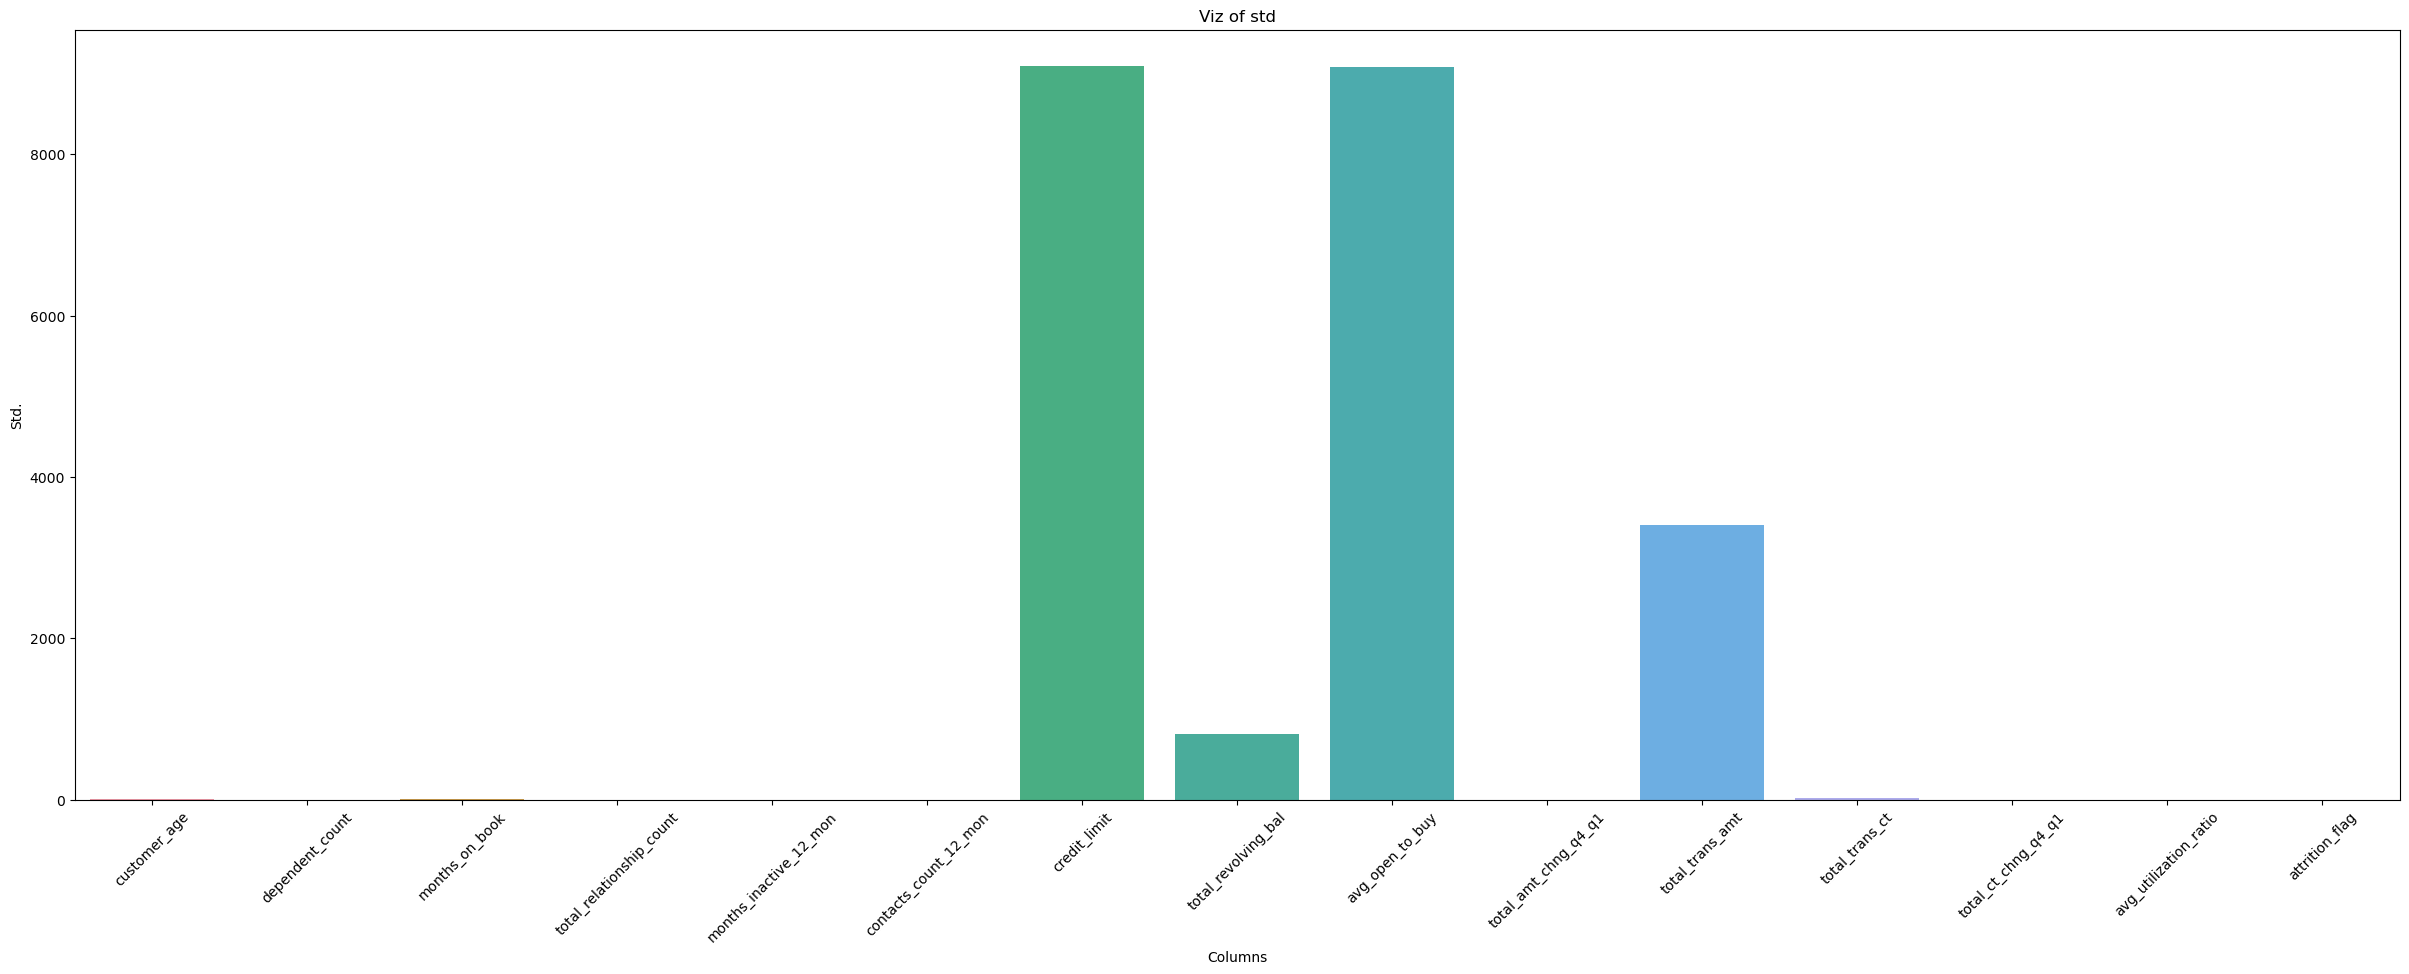

In [14]:
plot_noise(df_train)

### Plot Outlayers

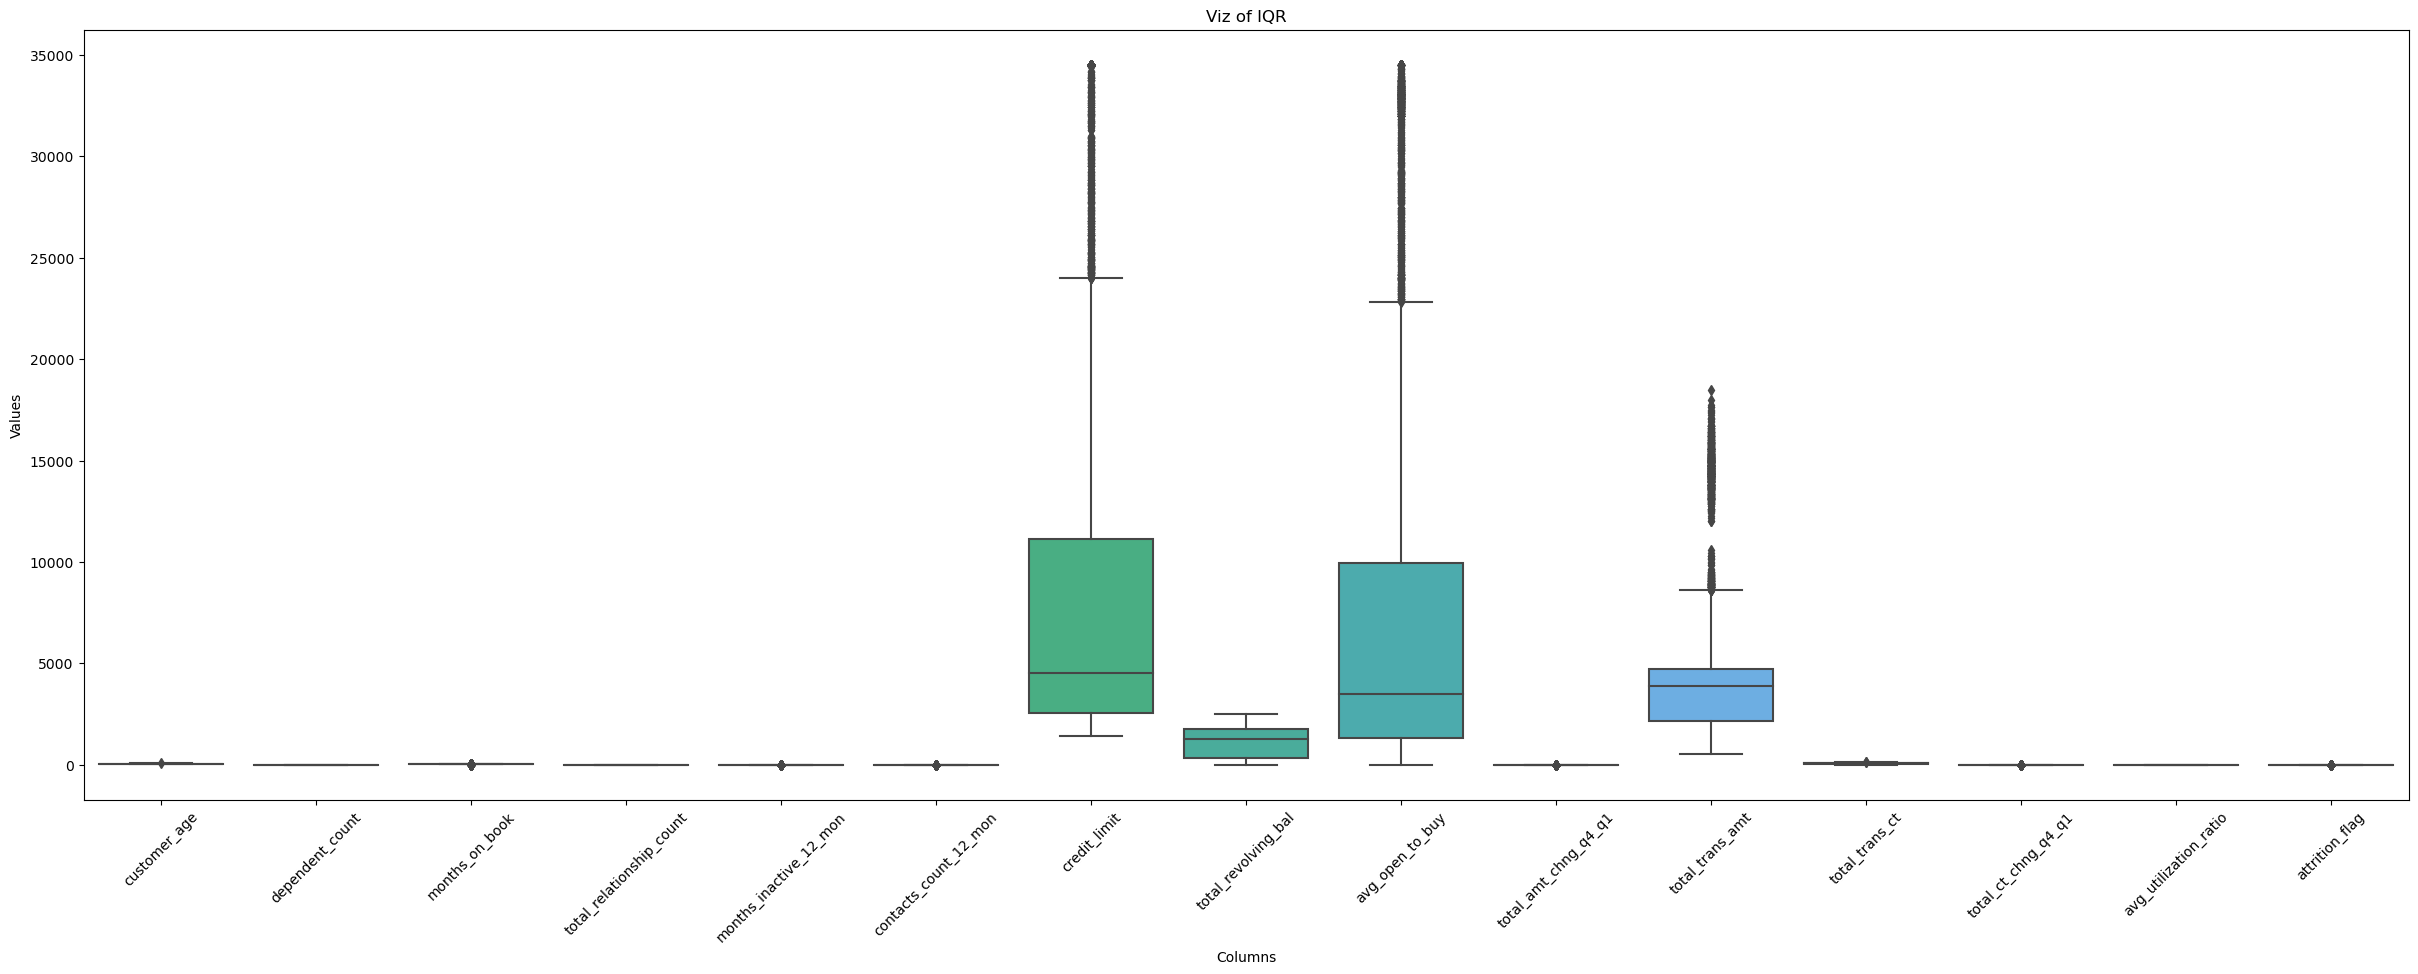

In [15]:
plot_outlayers(df_train)

### Features Correlation

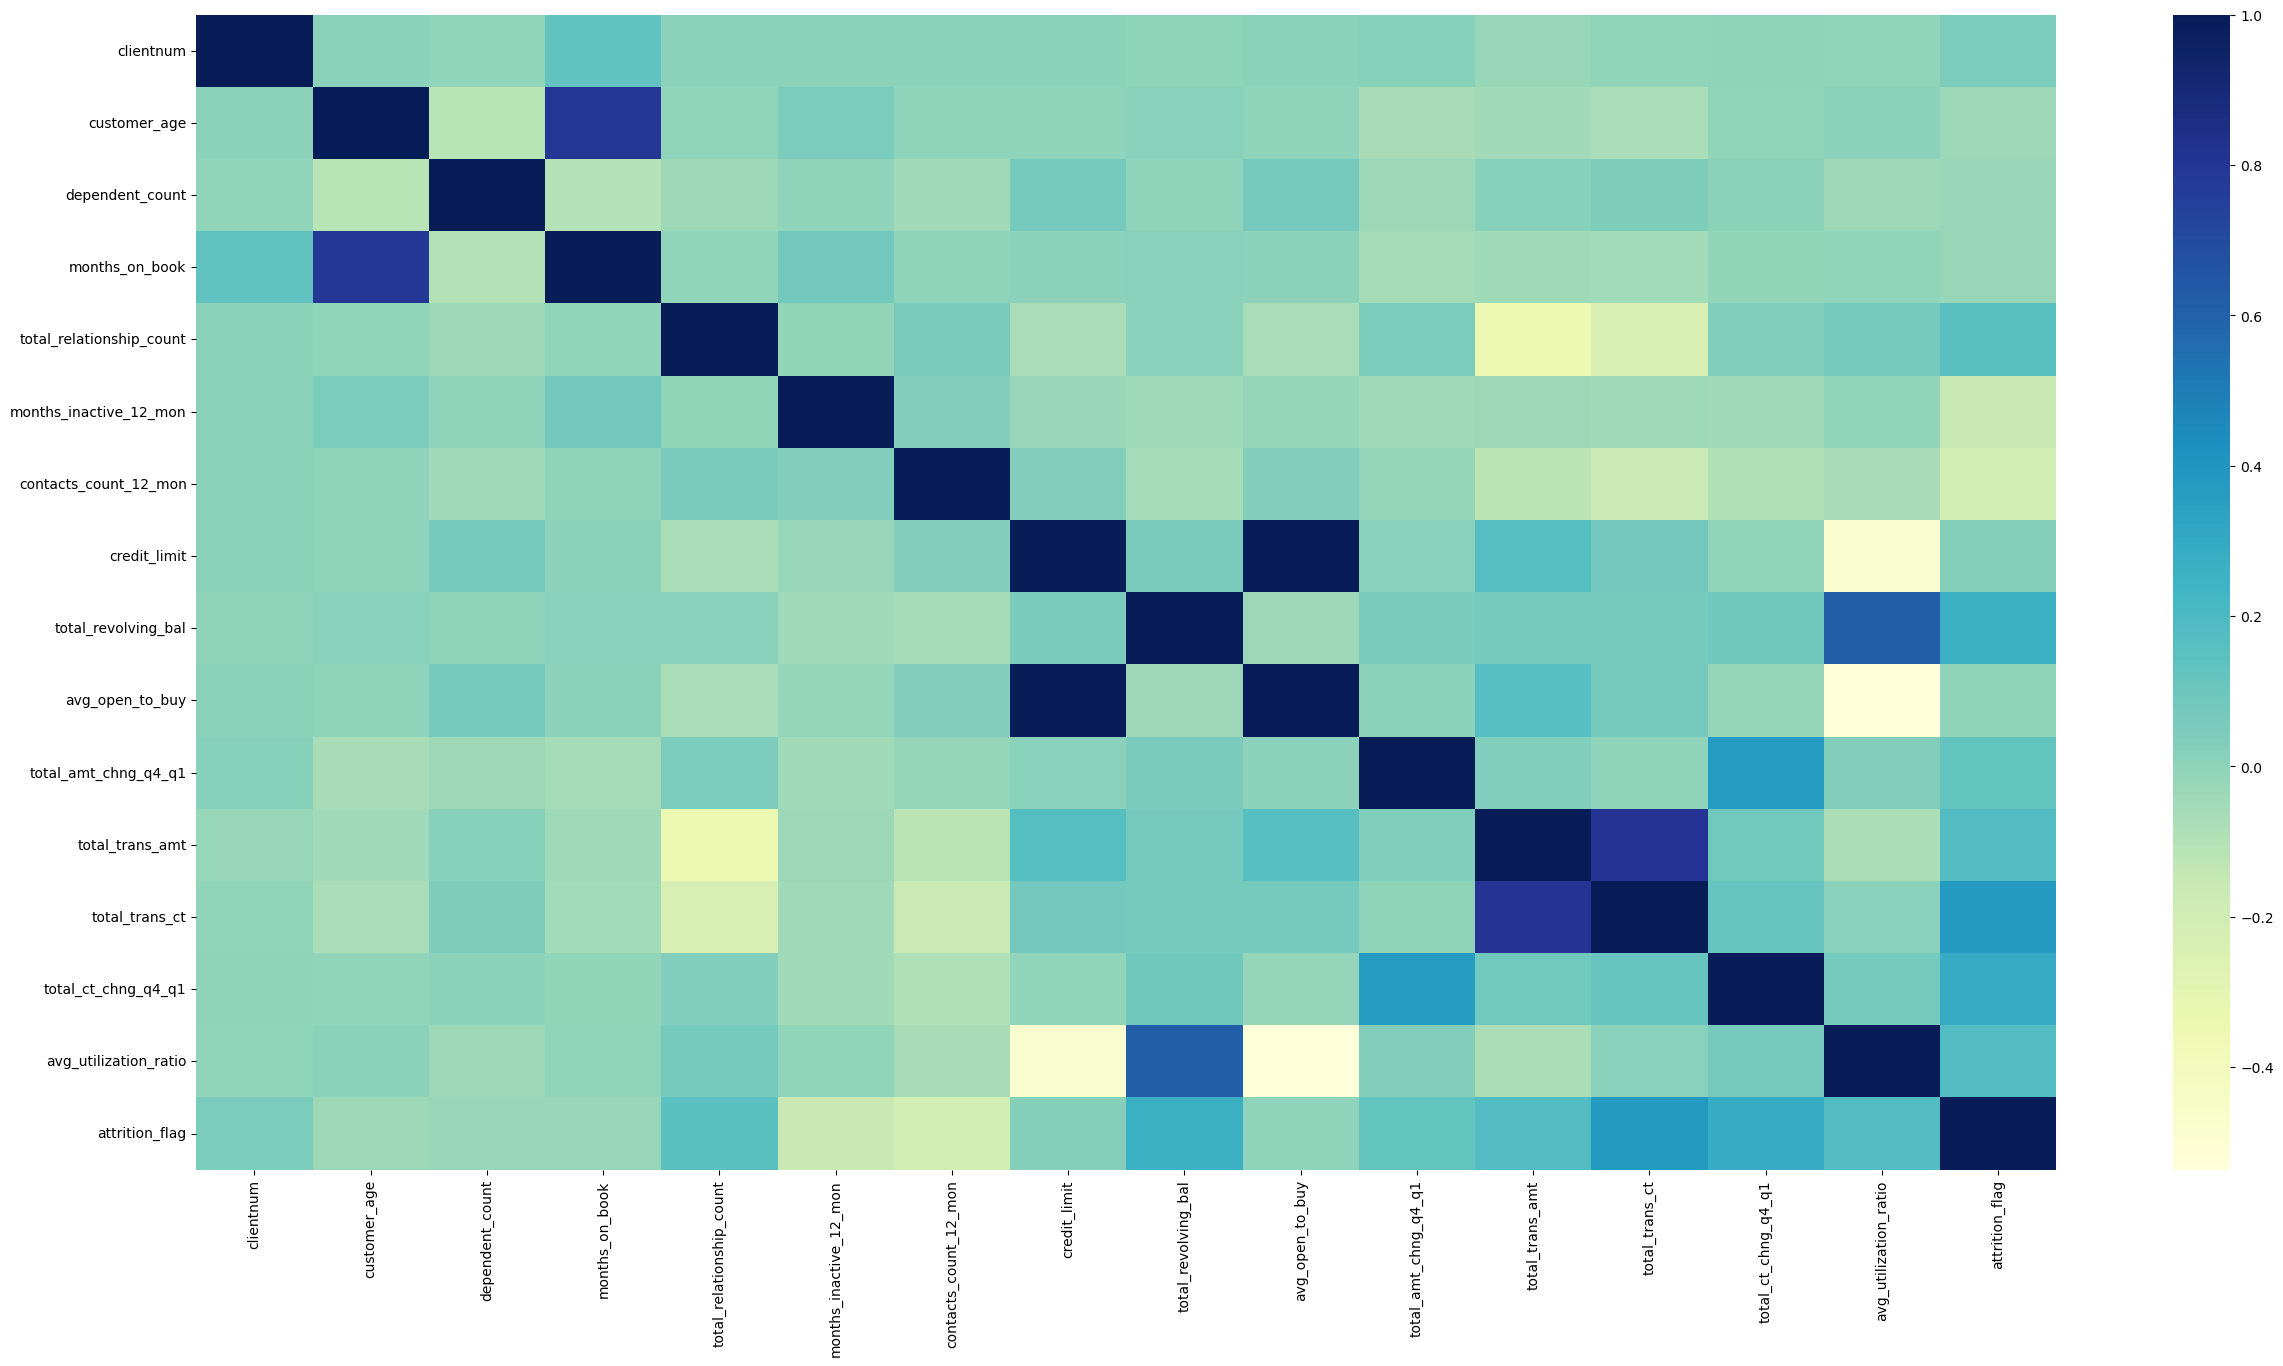

In [16]:
#Features Correlation
plt.figure(figsize = (30, 15))
x = sns.heatmap(df_train.corr(), cmap = 'YlGnBu')

### Target: Churn

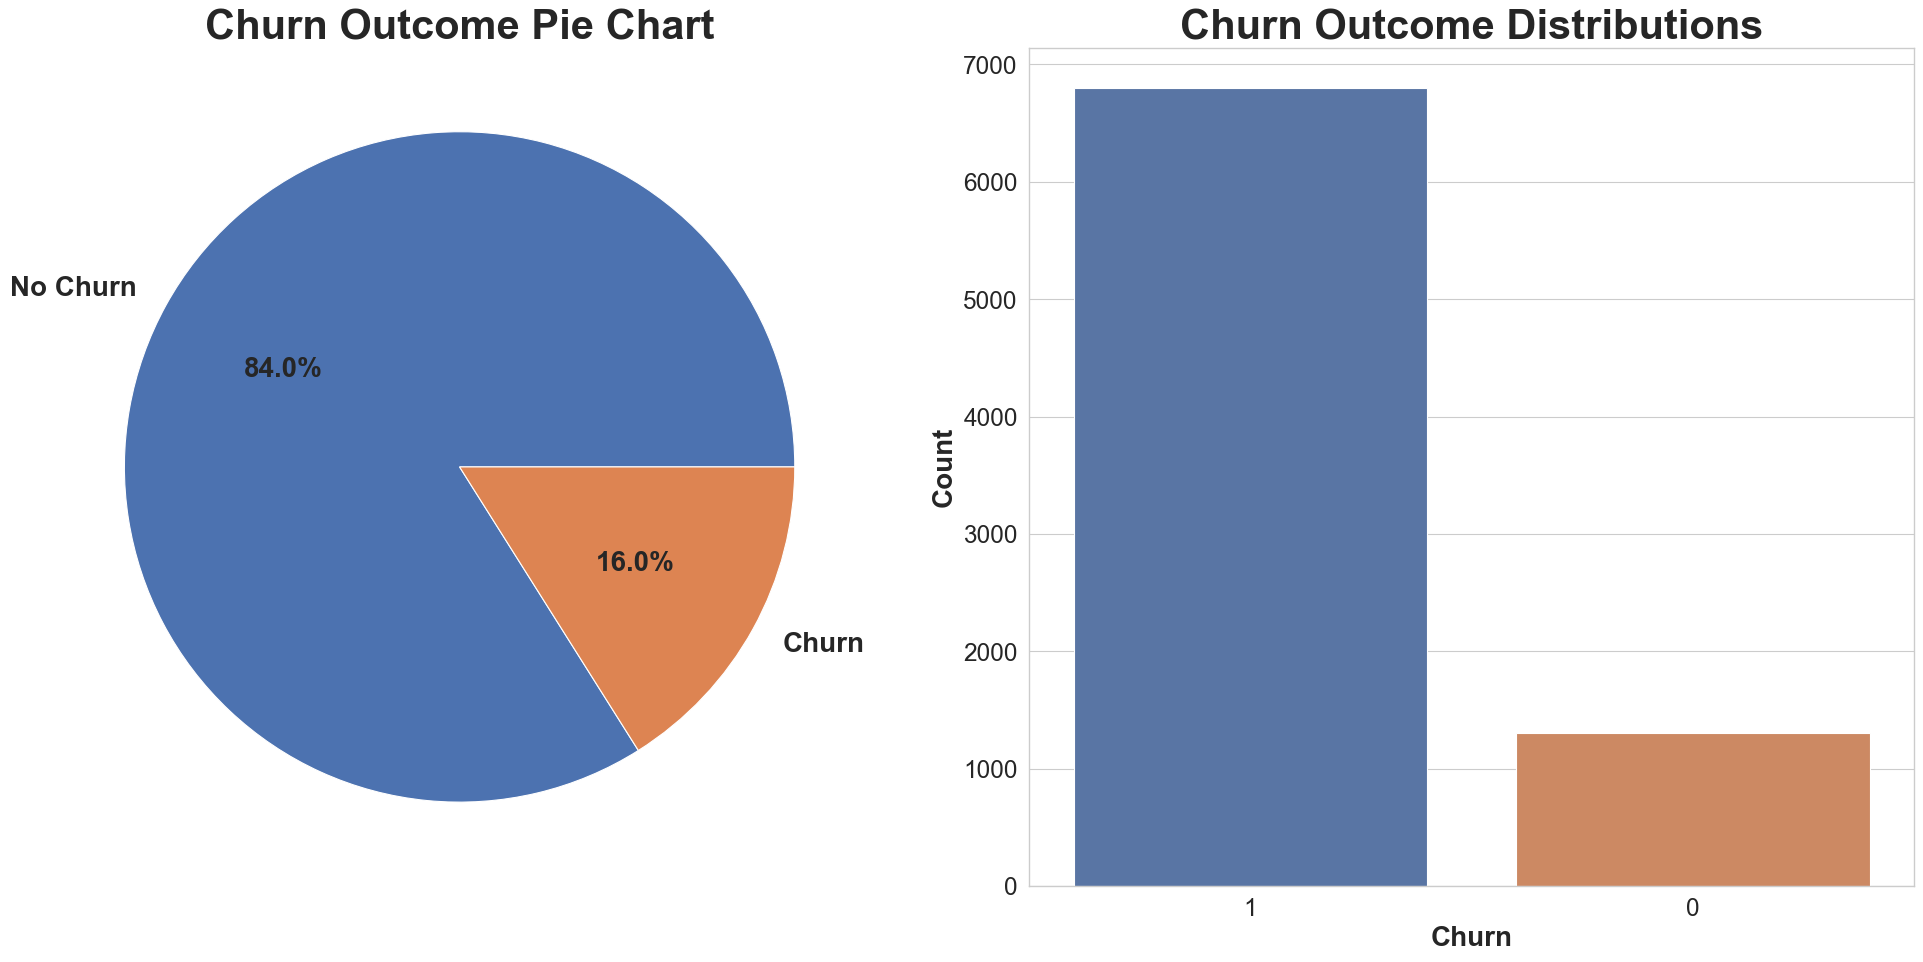

In [17]:
plot_target_dist(df_train)                 

## Numerical Features

In [18]:
# Numerical features
numerical_features = df_train.drop(['clientnum','attrition_flag'], axis=1).select_dtypes(include=[np.number]).columns

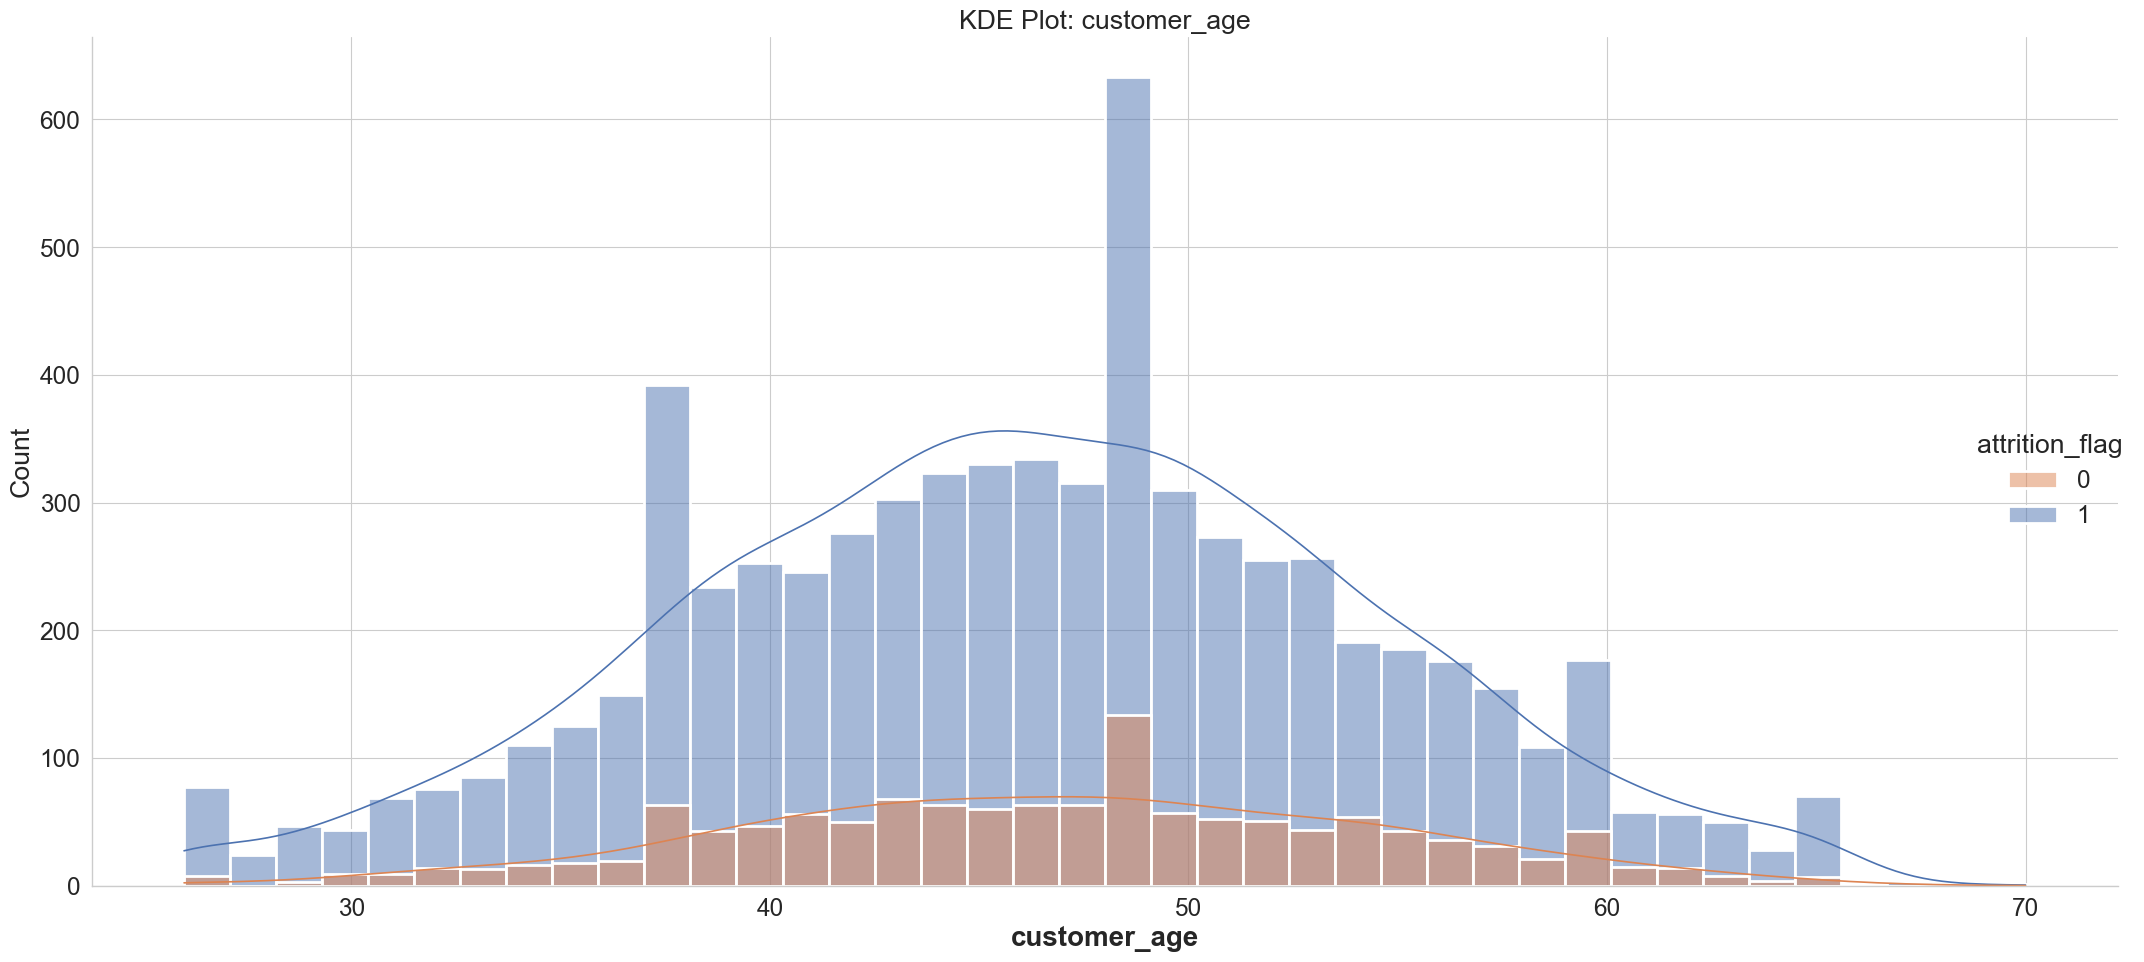

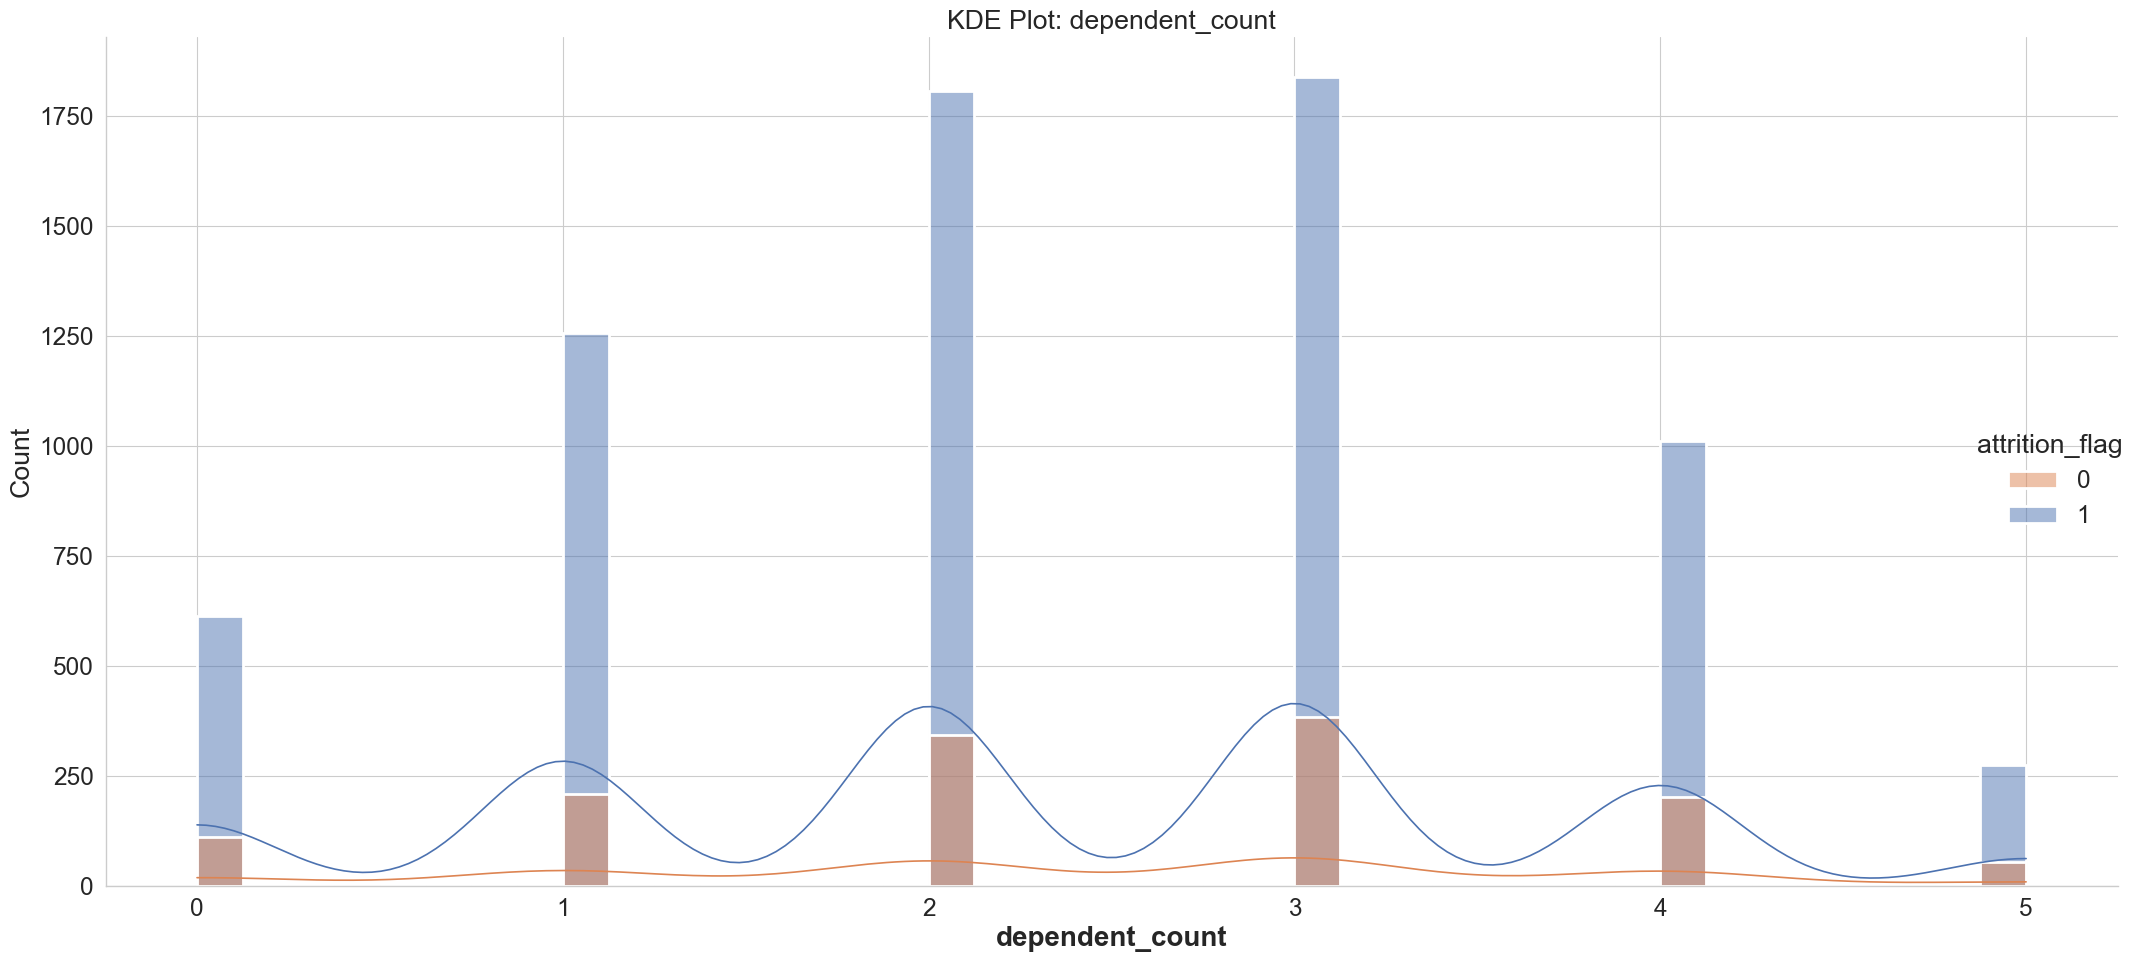

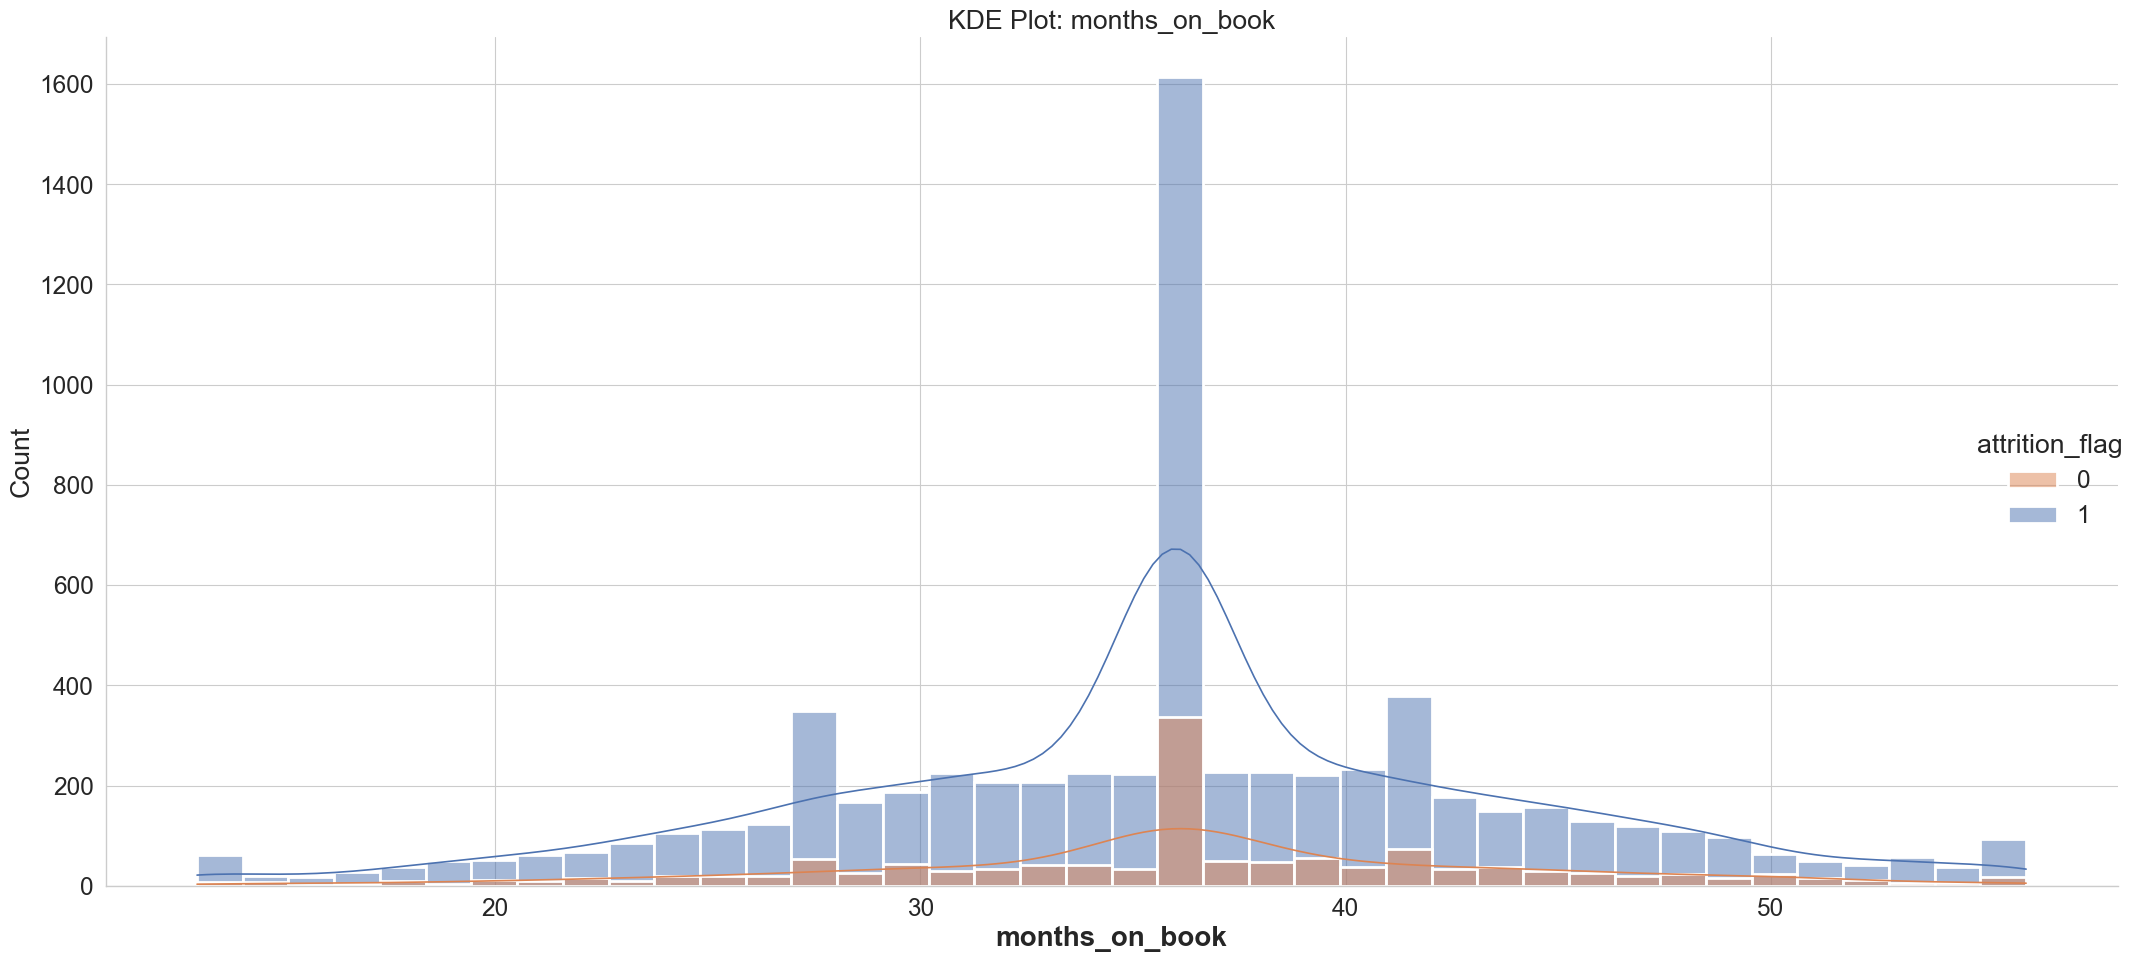

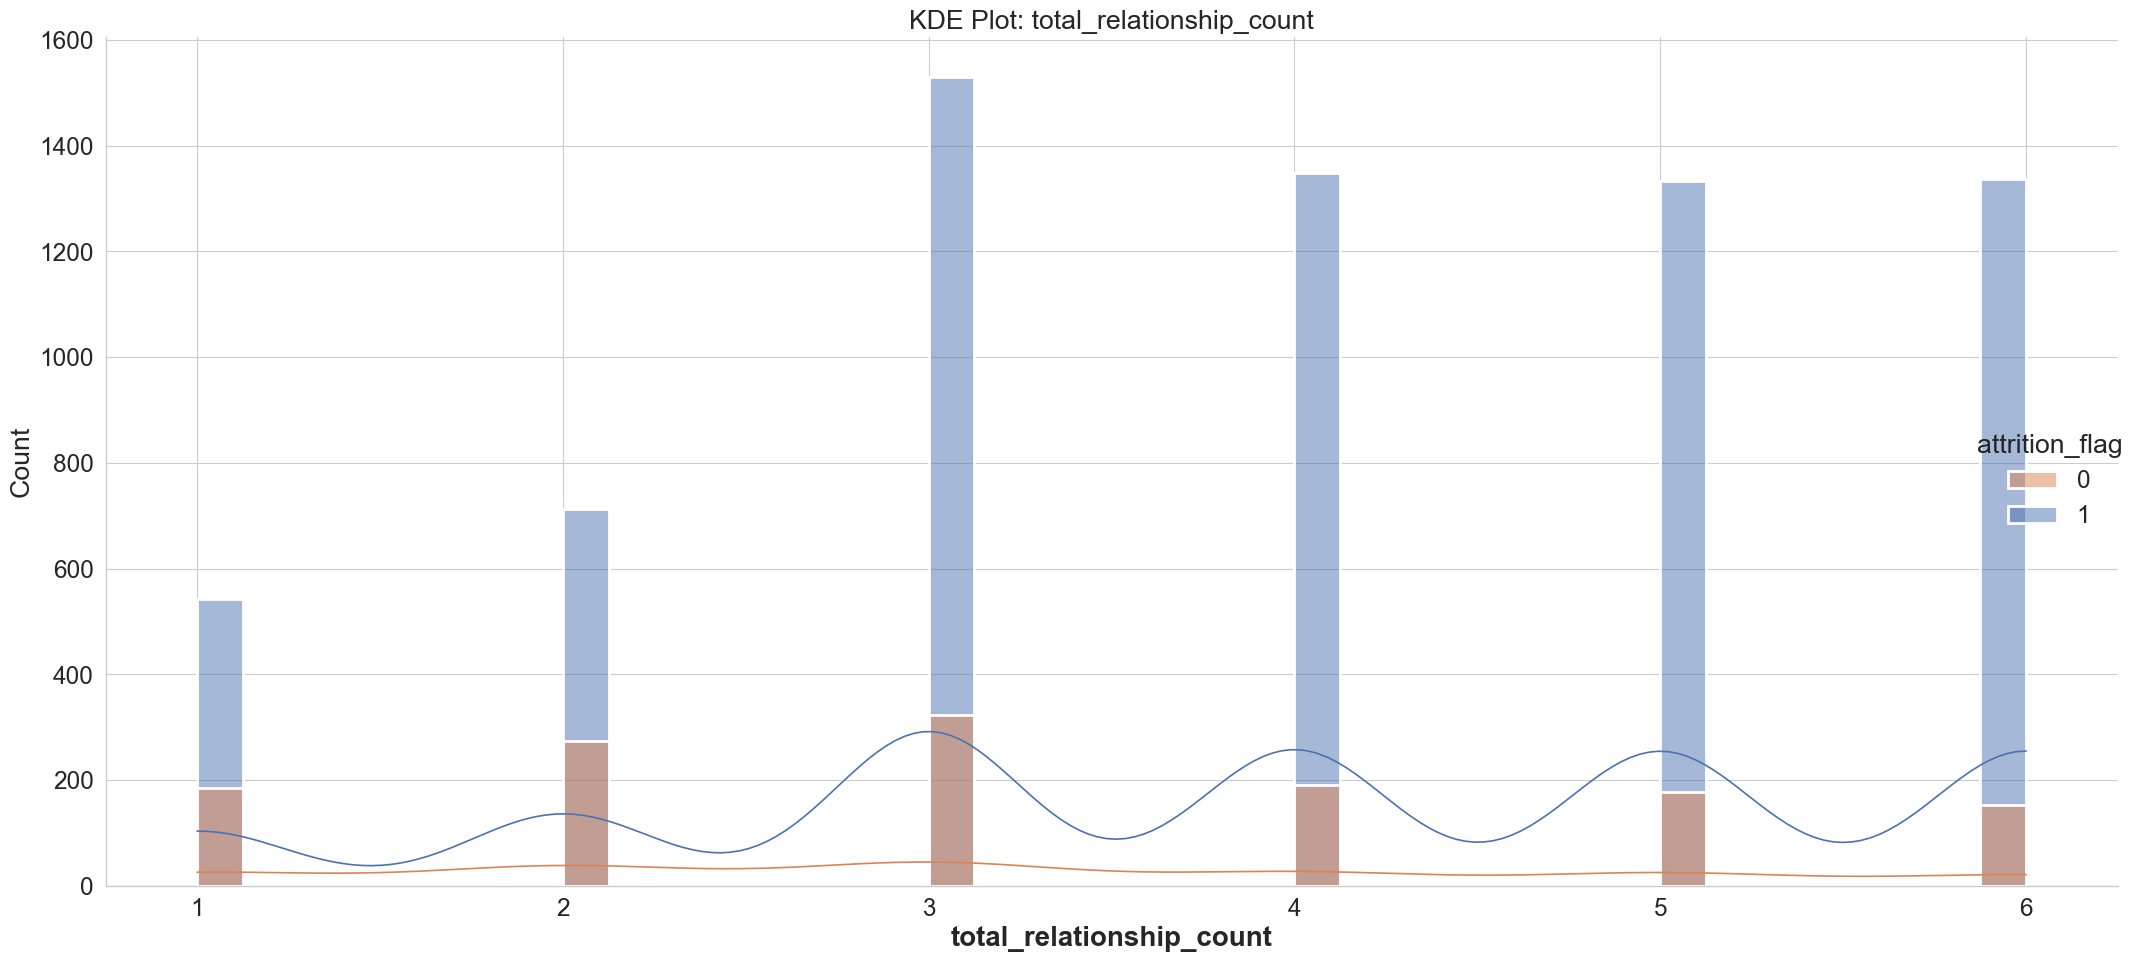

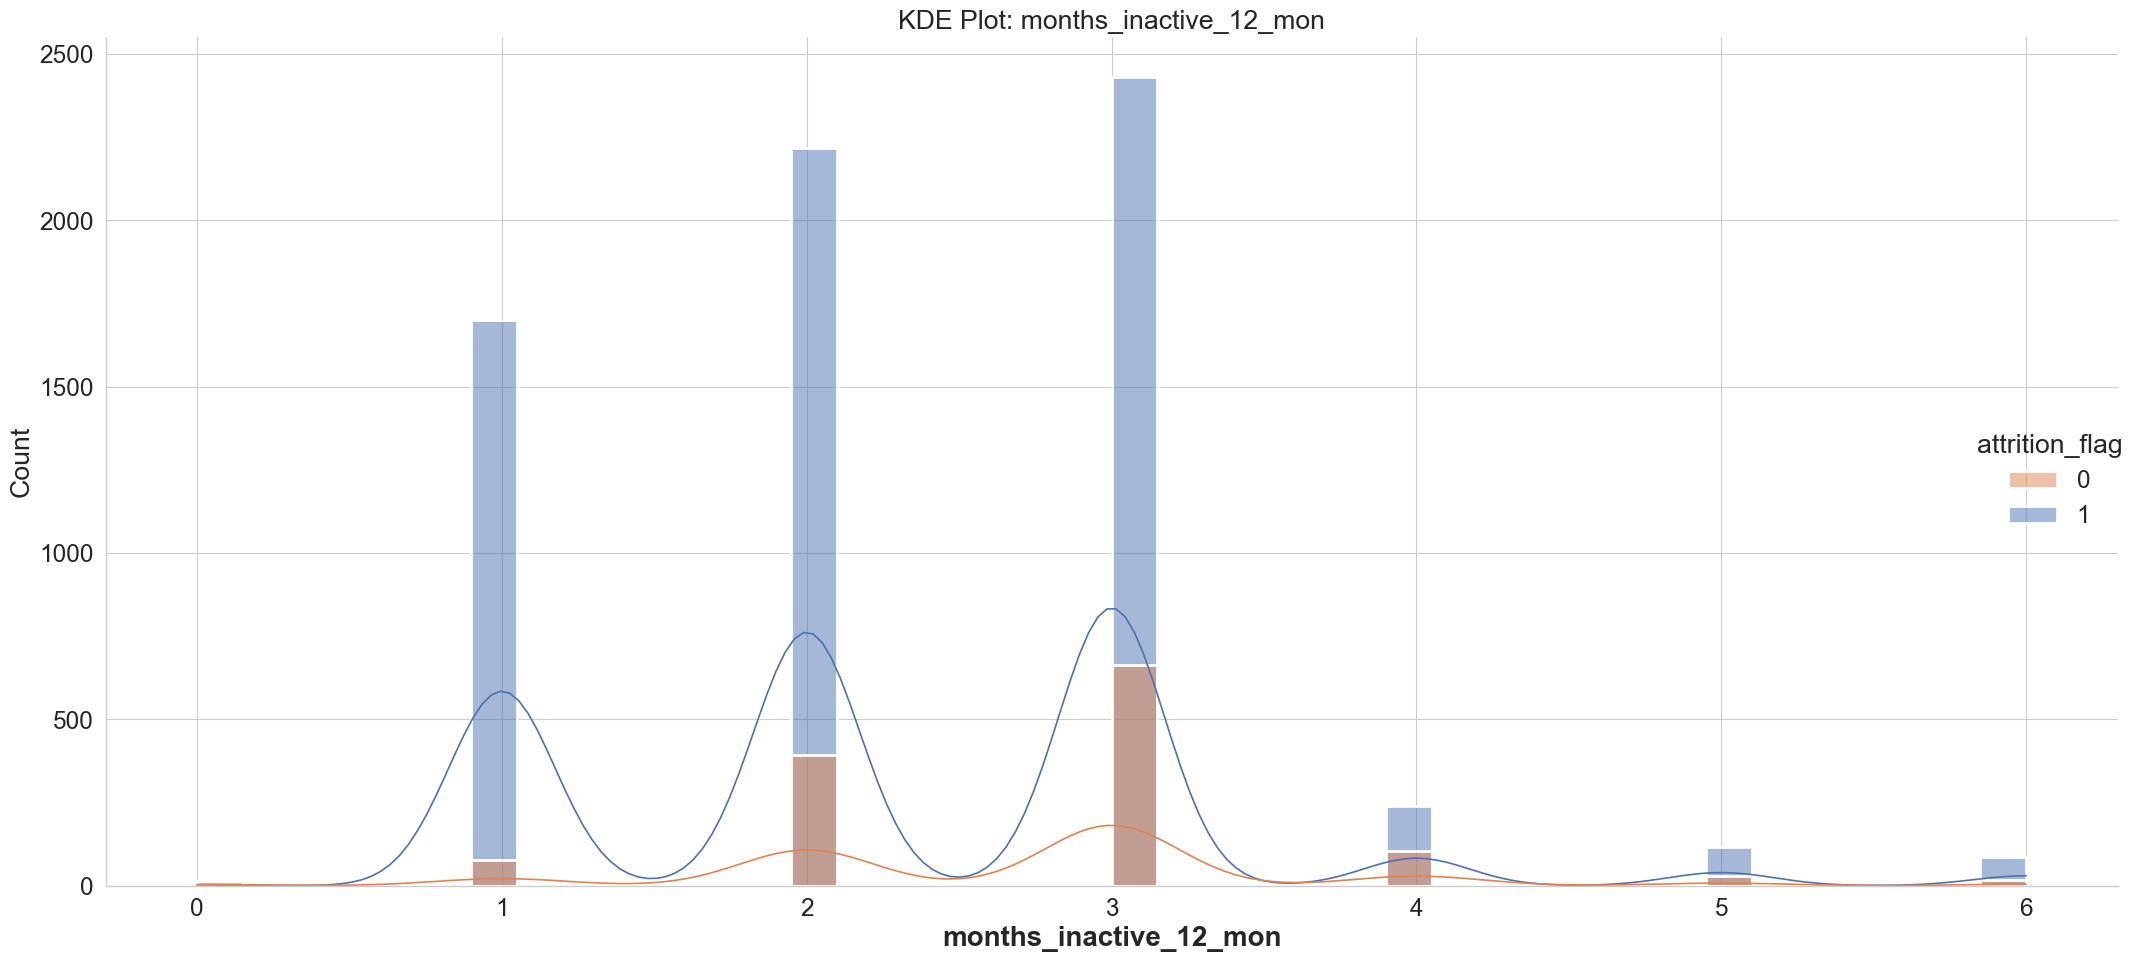

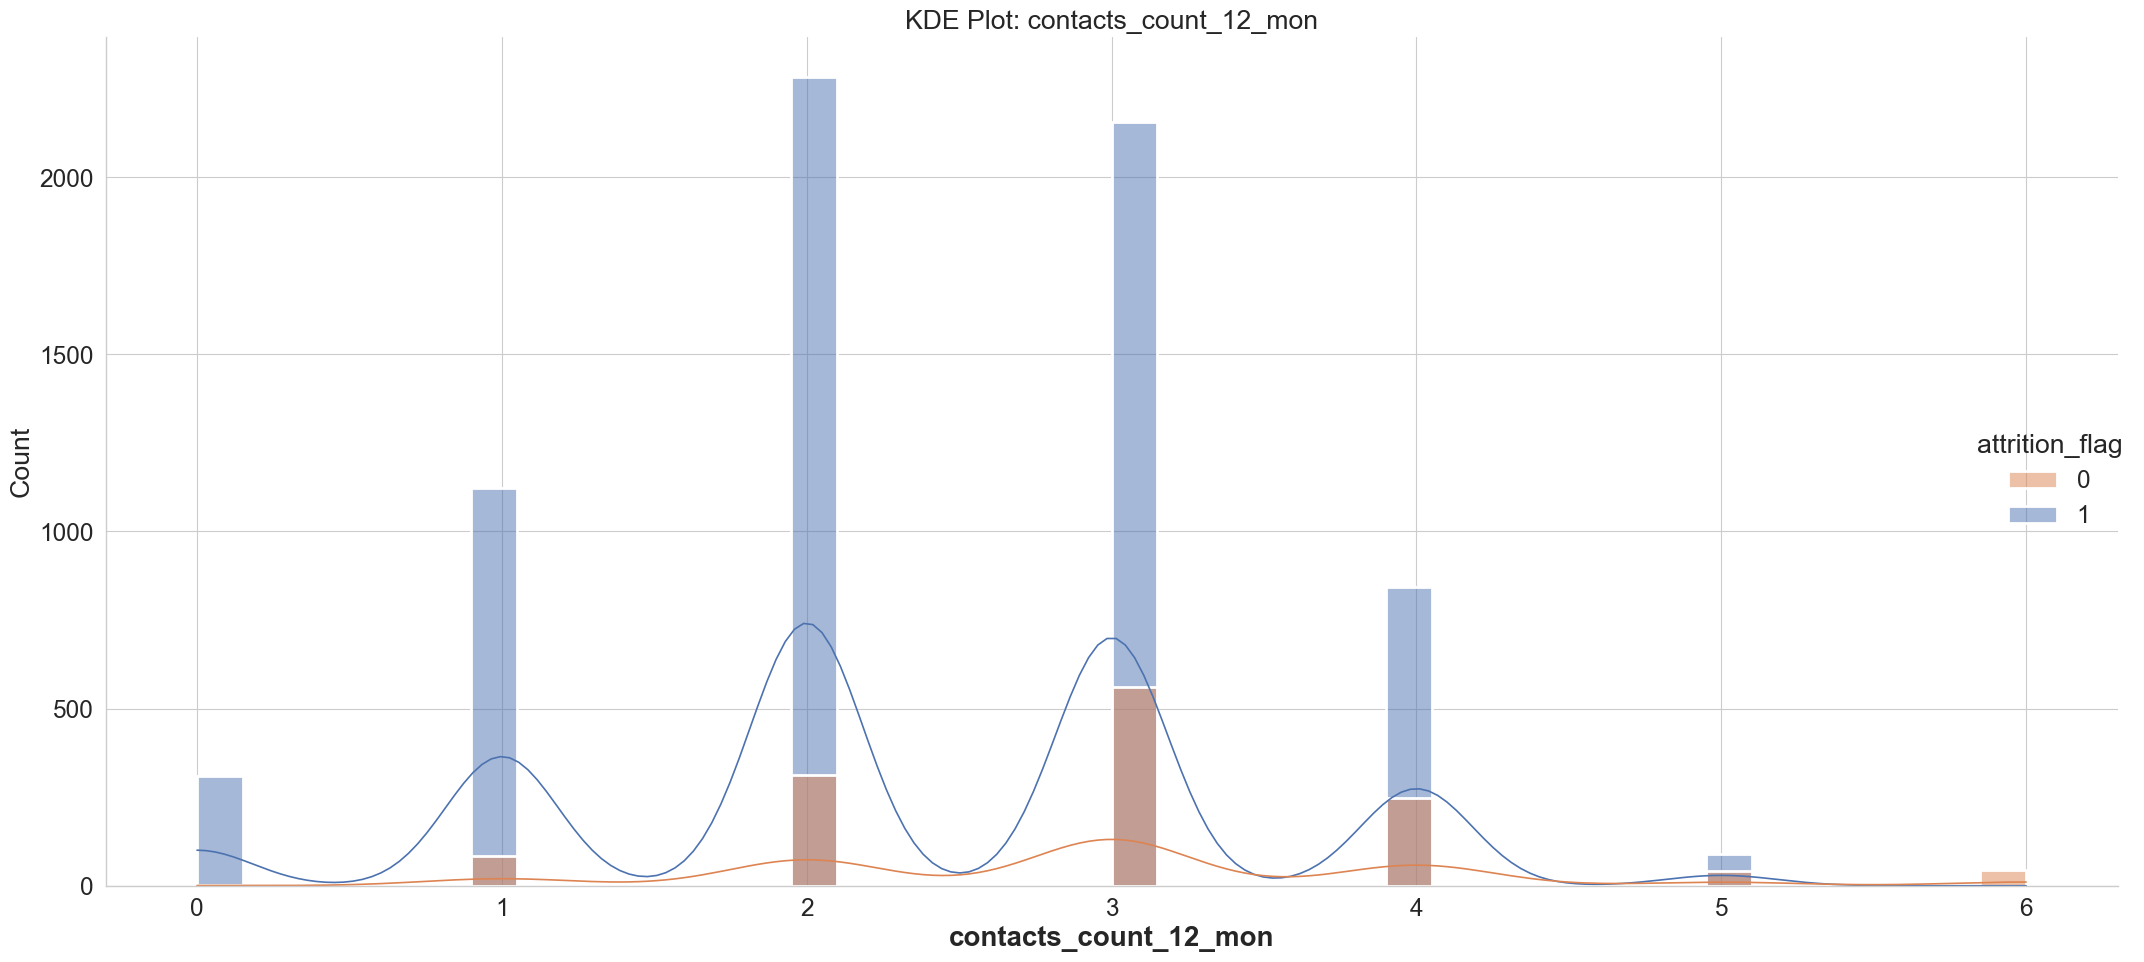

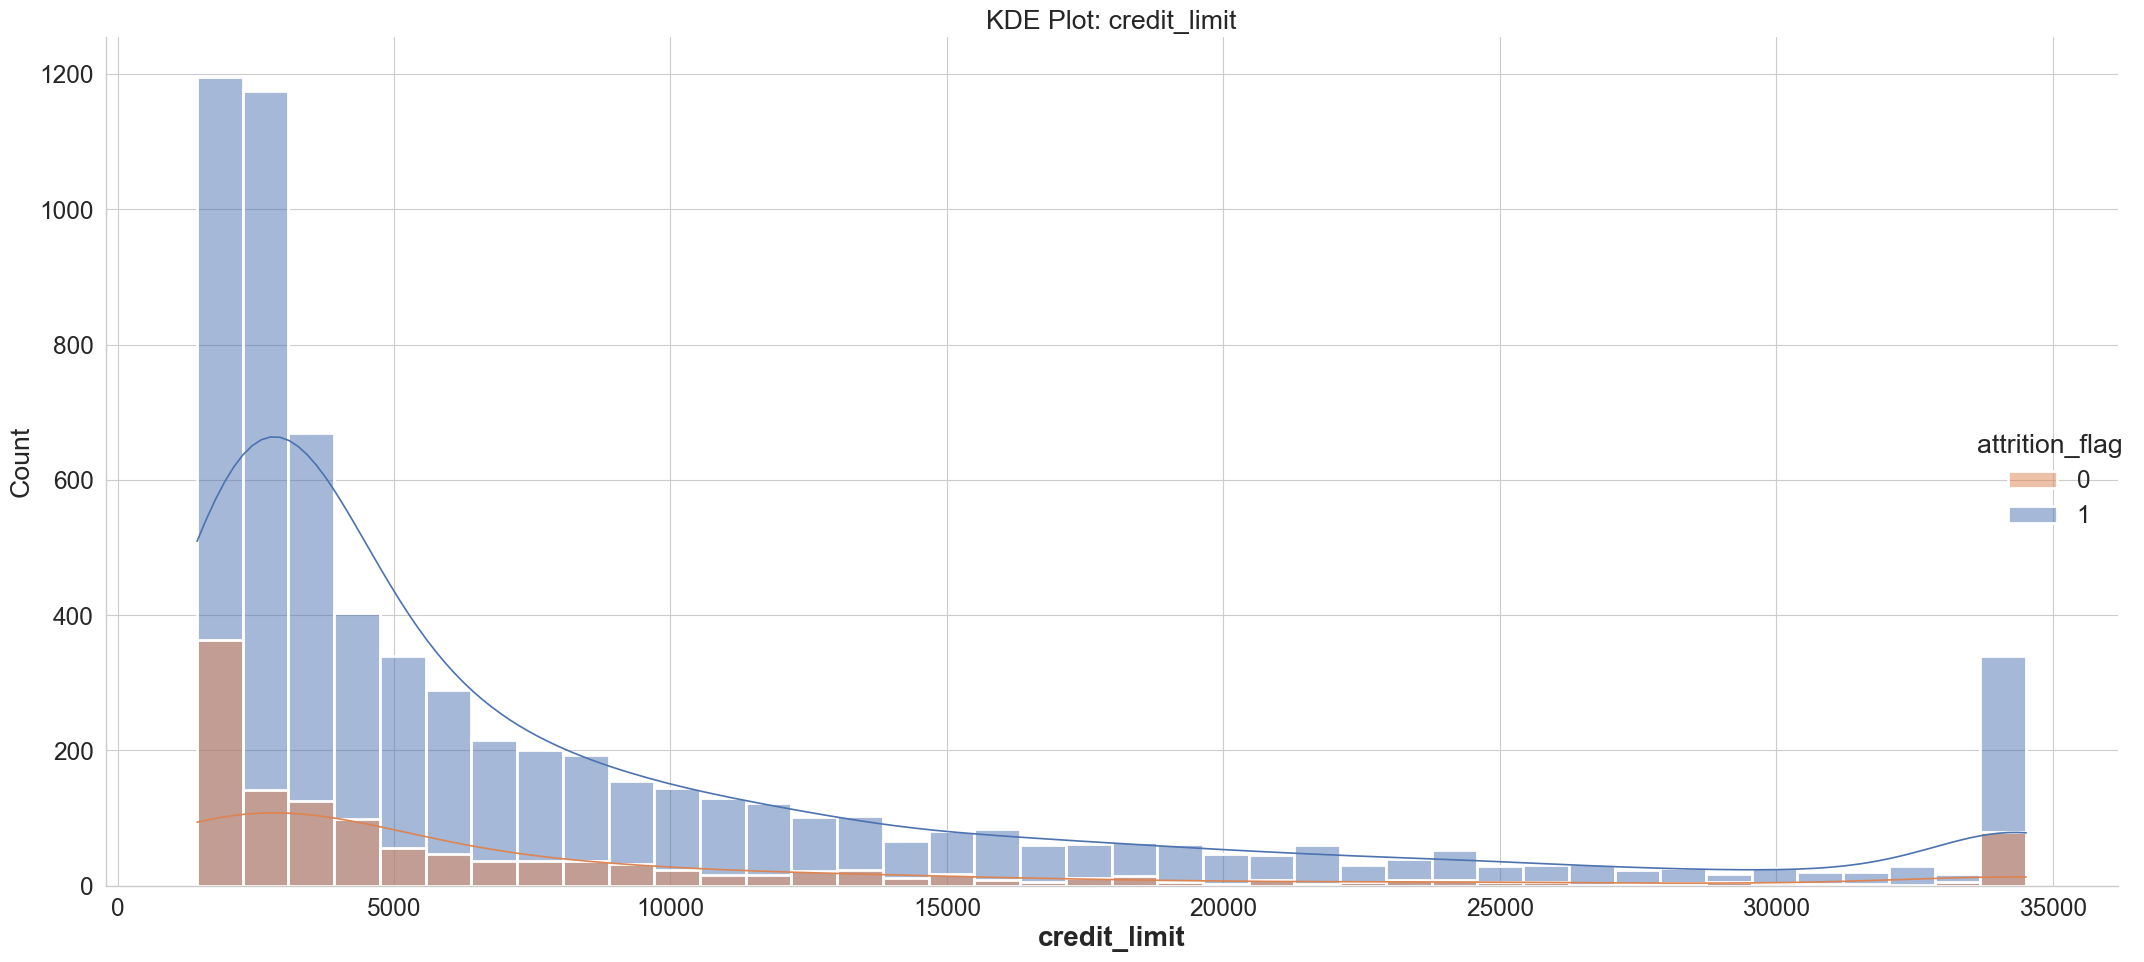

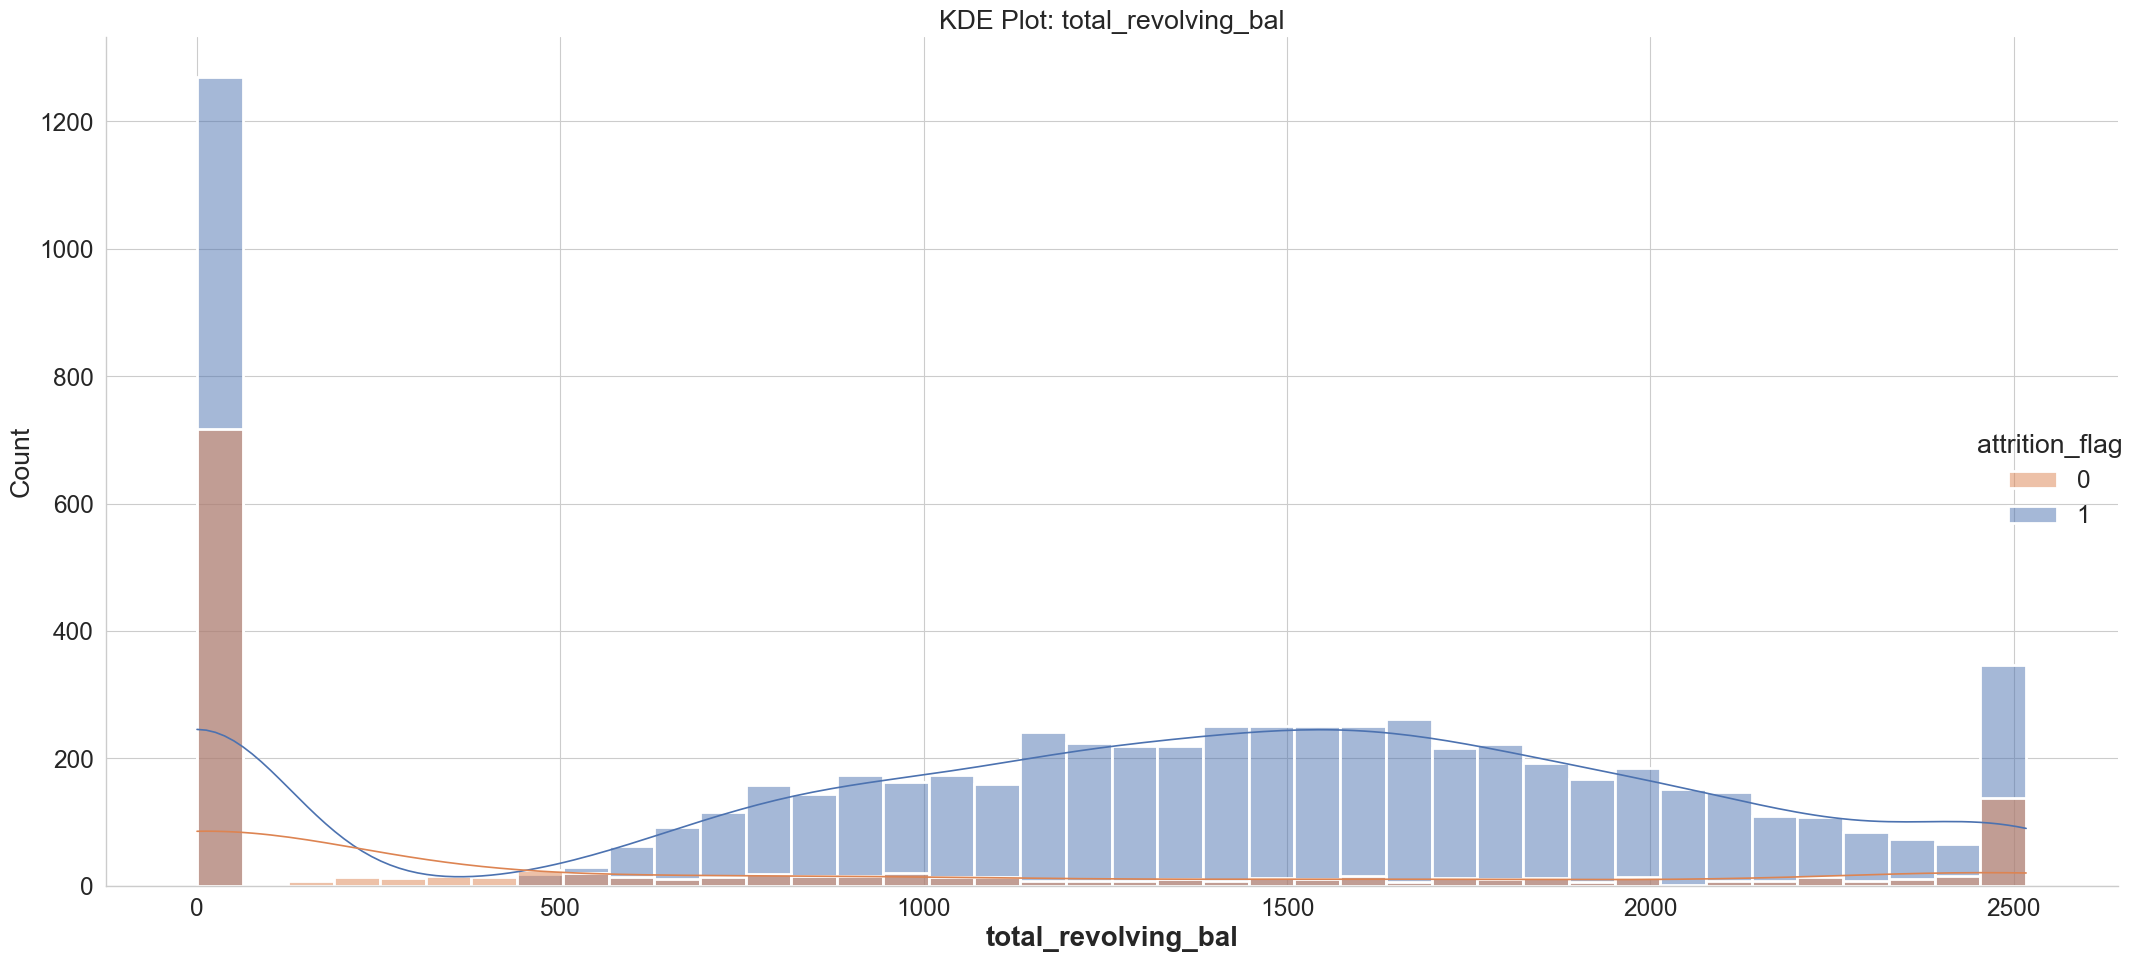

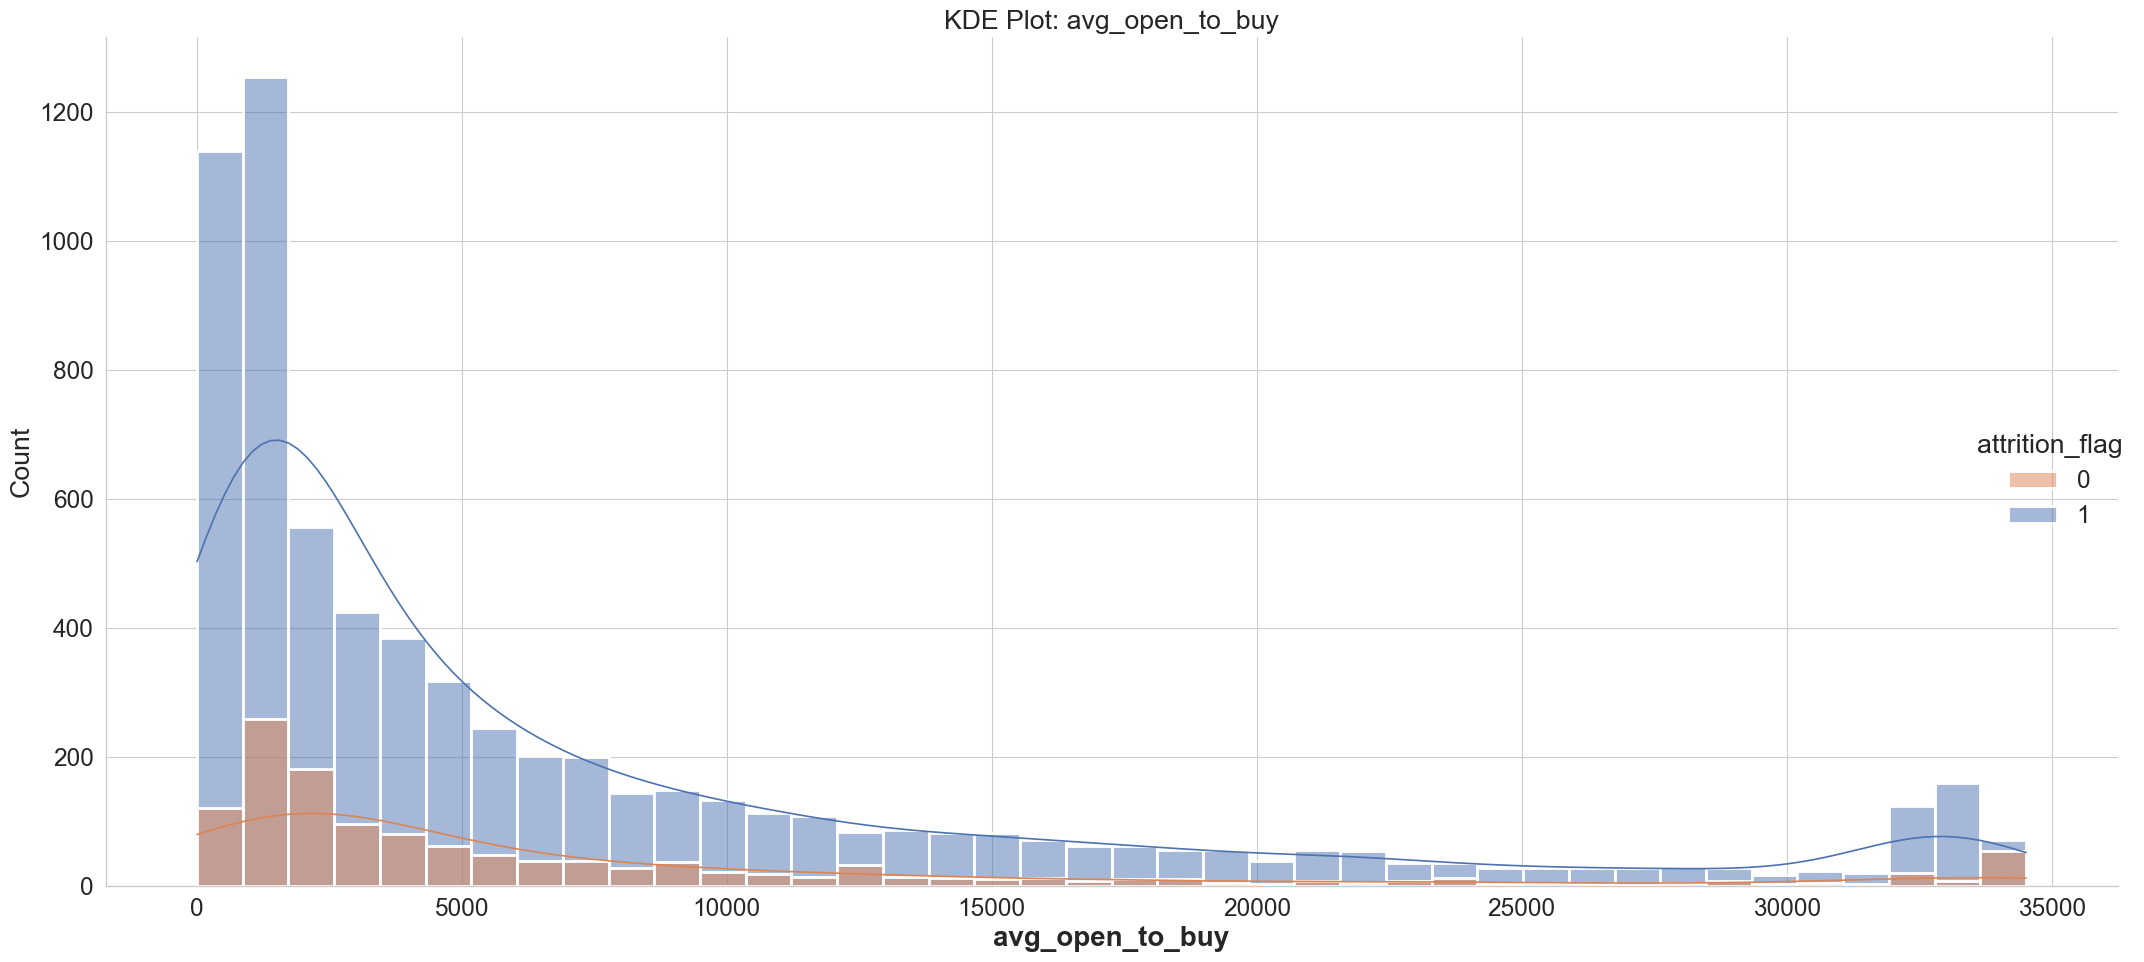

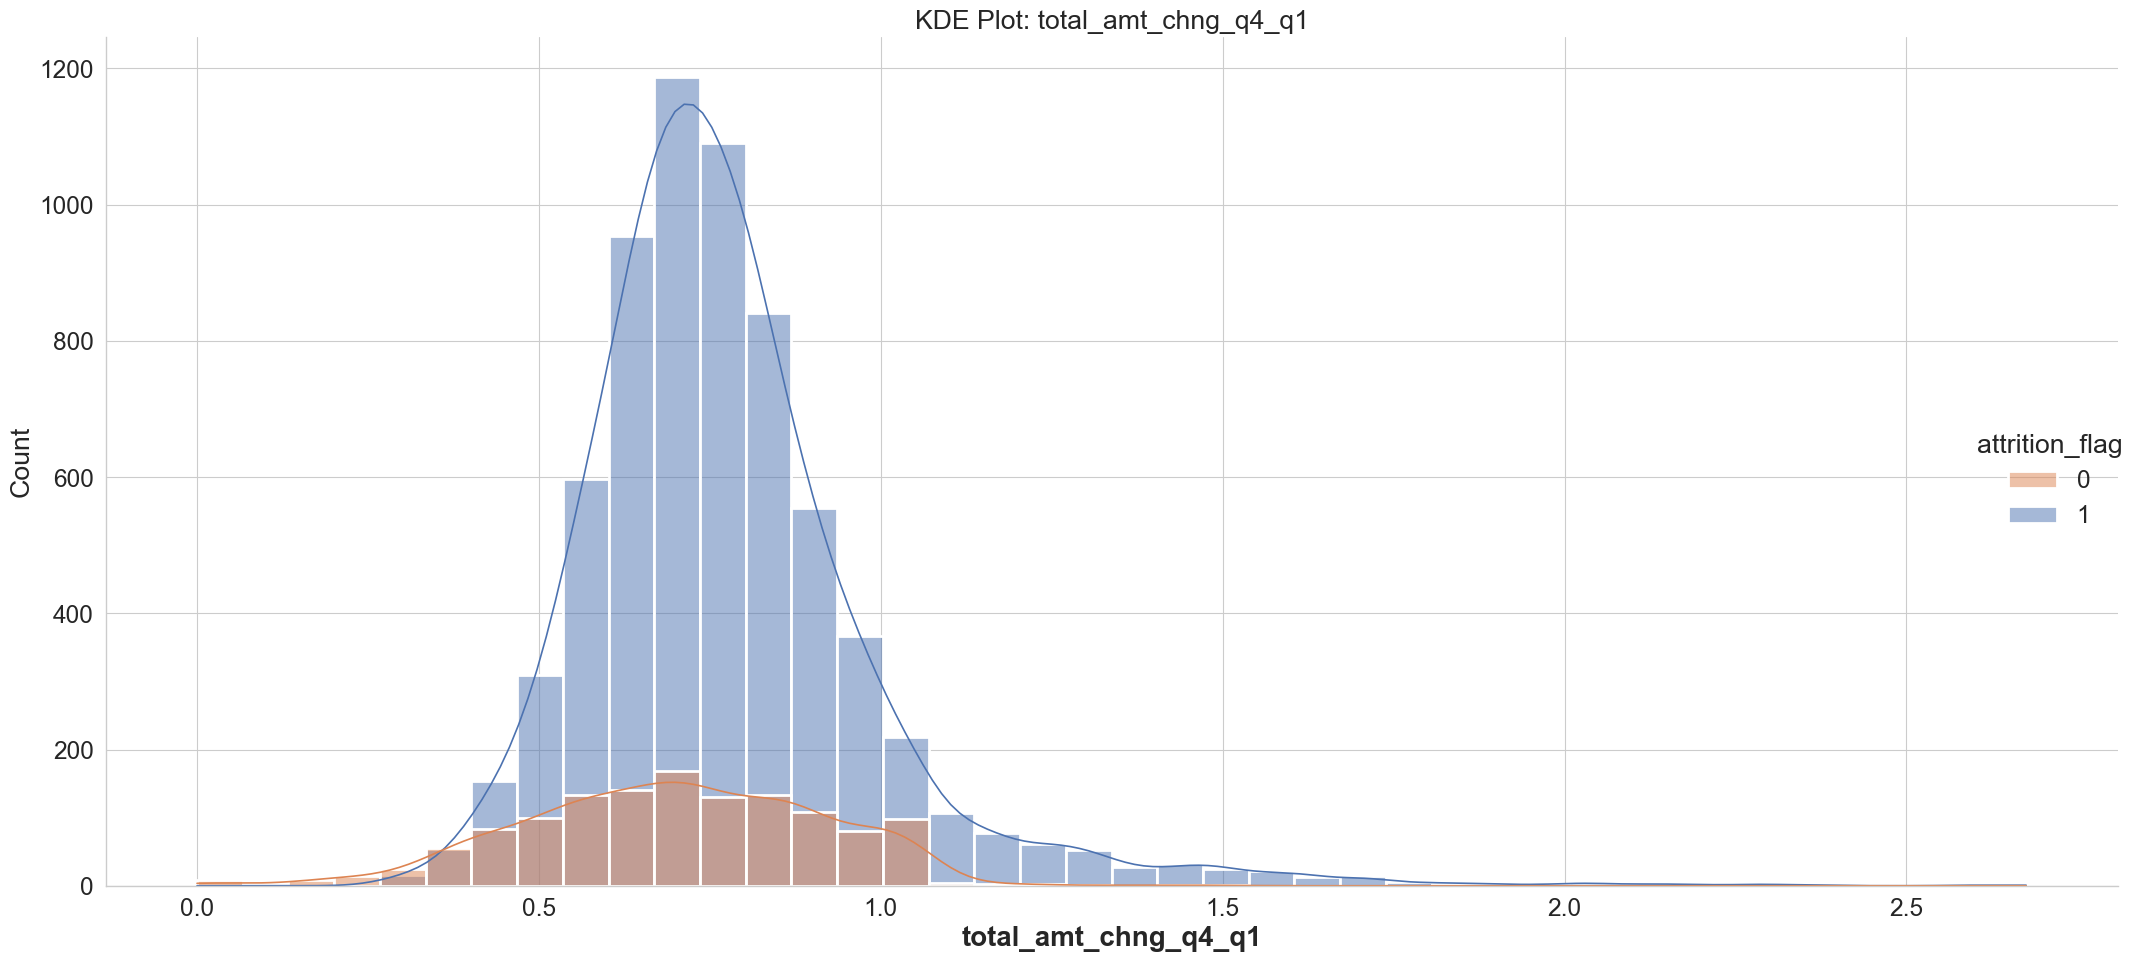

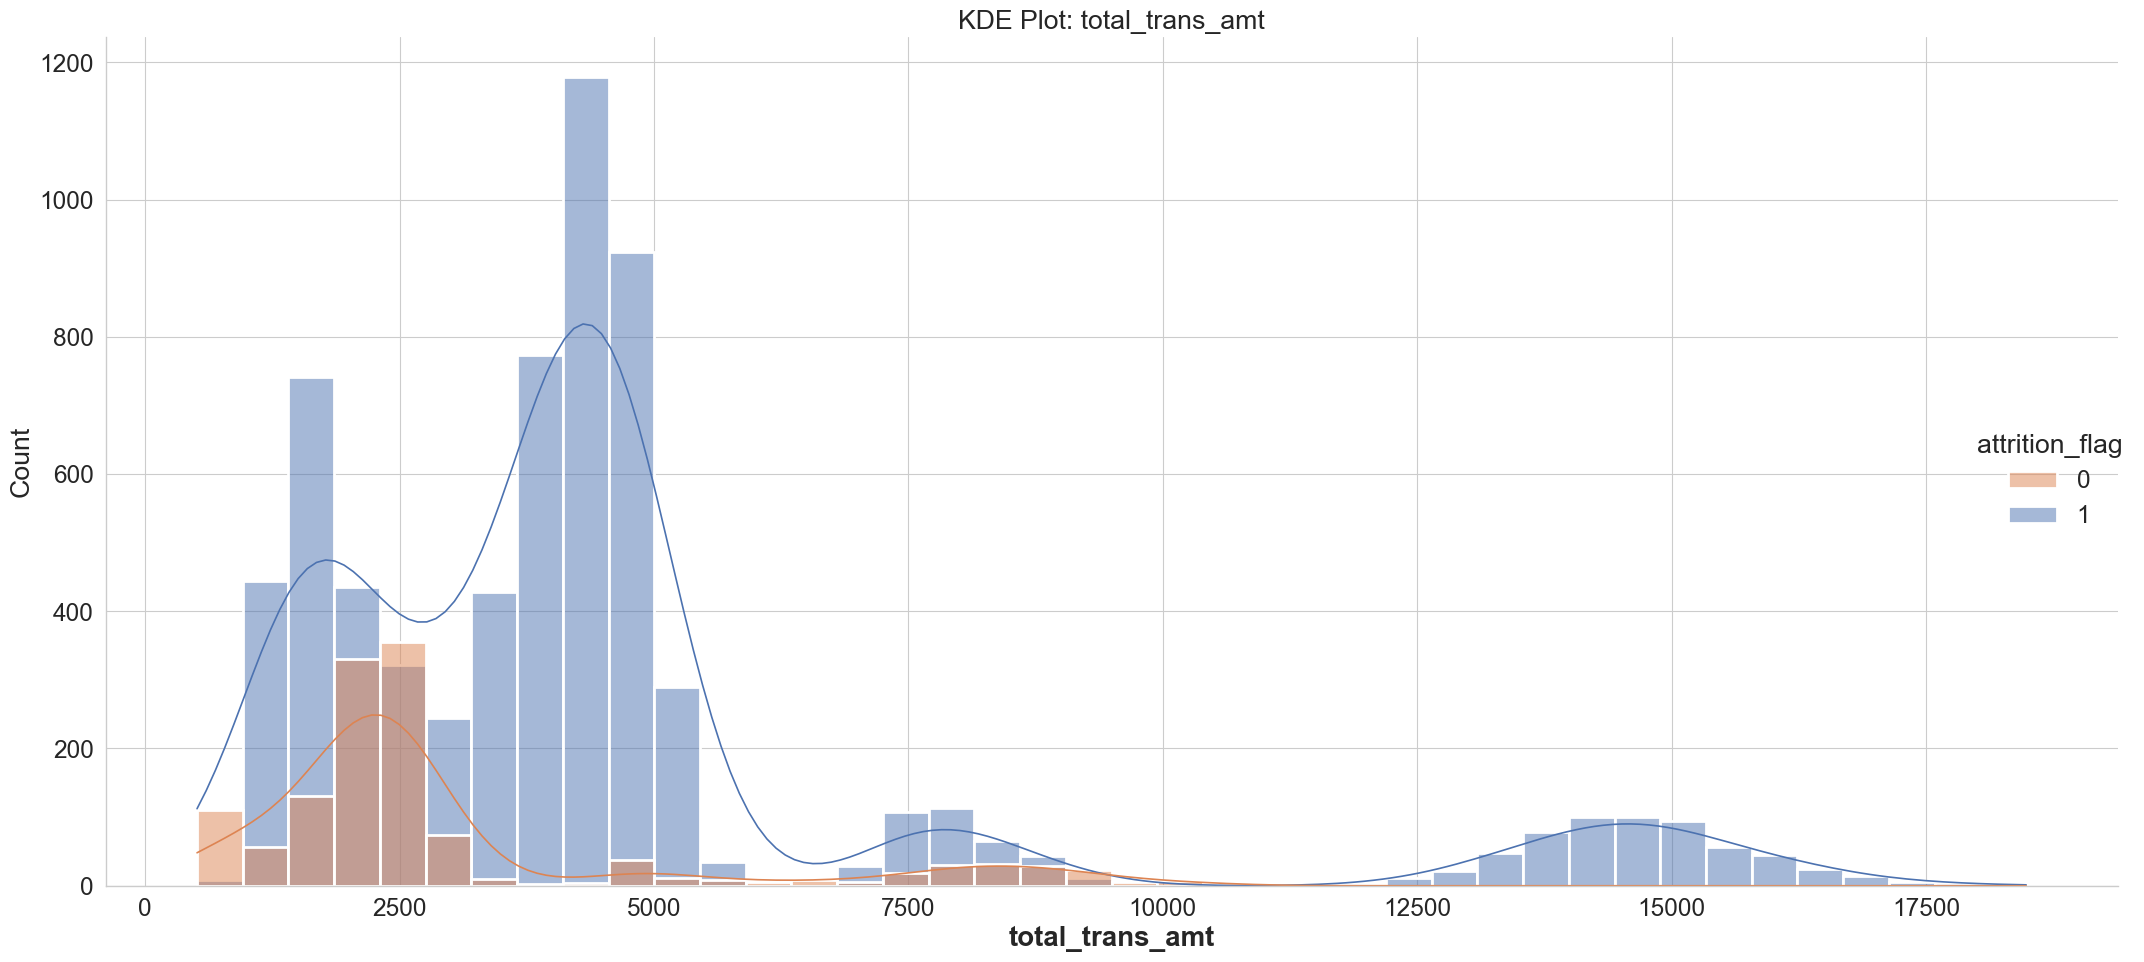

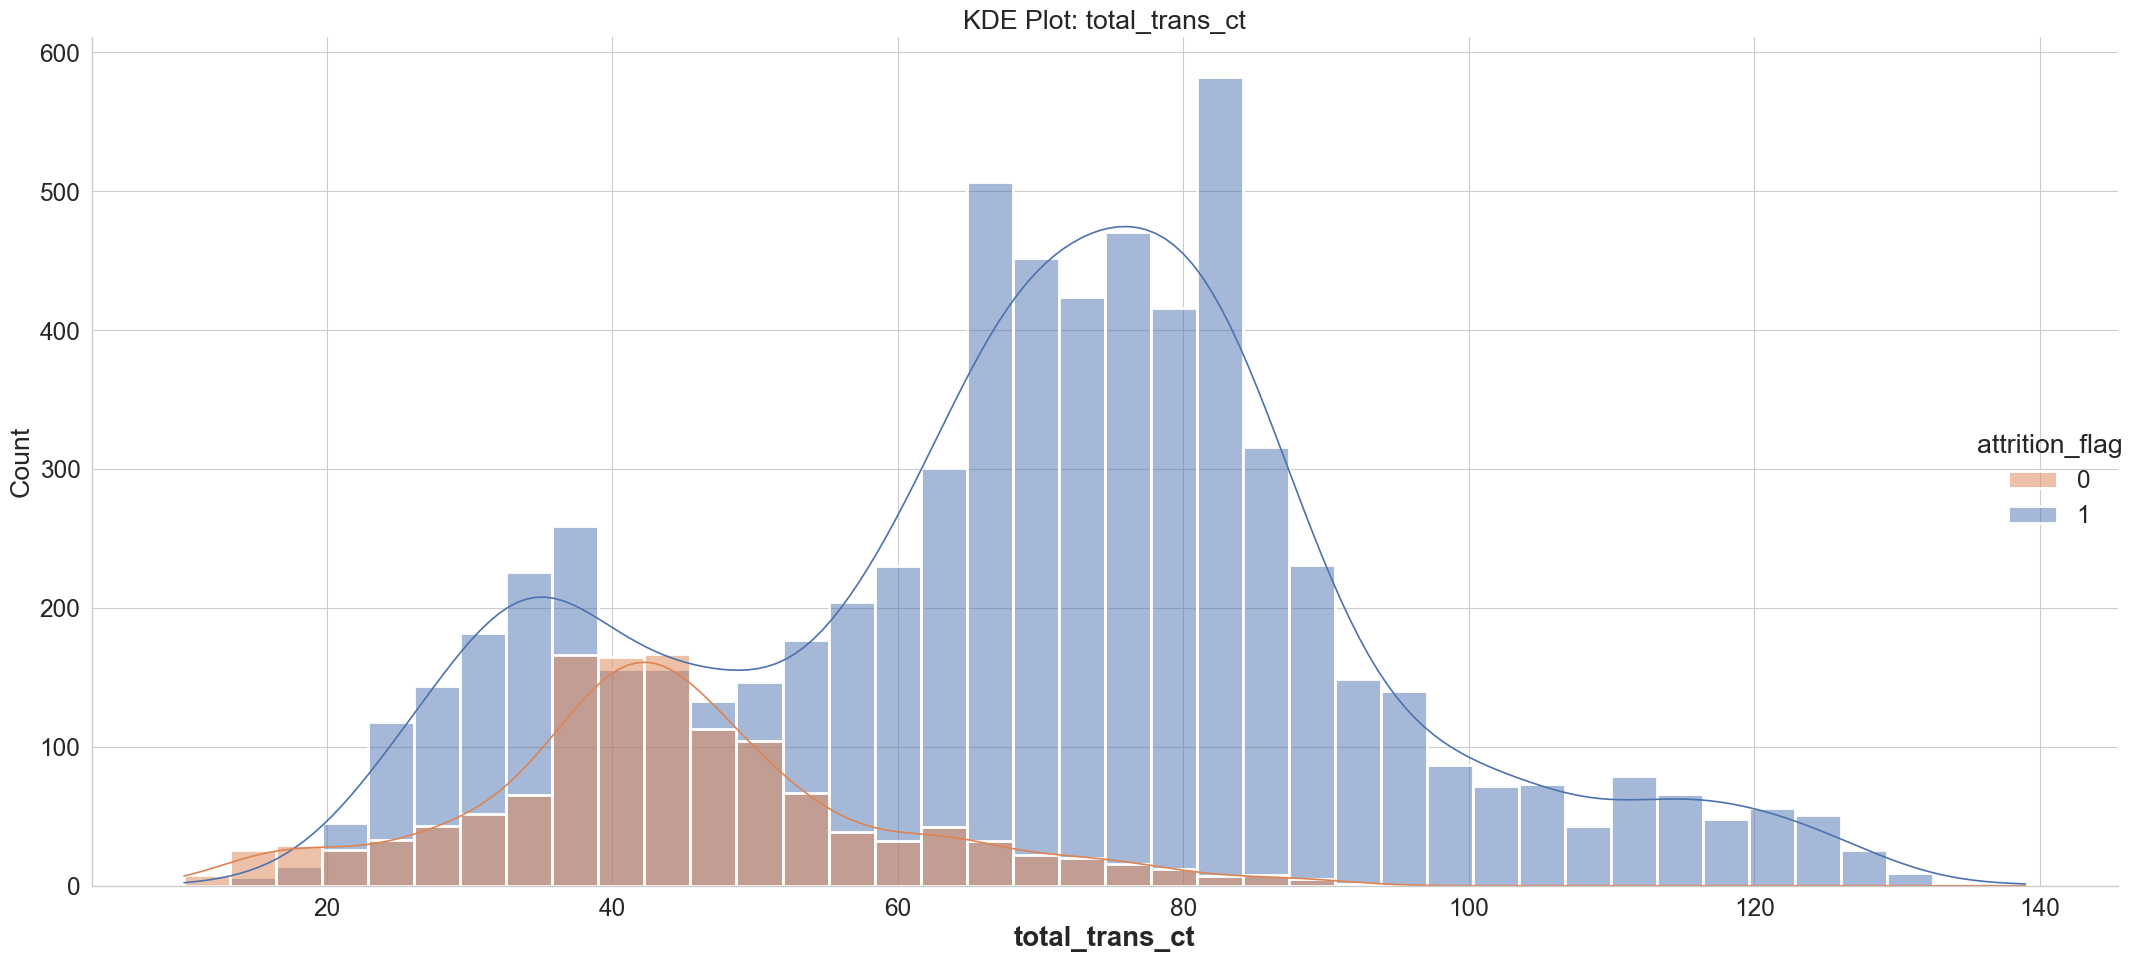

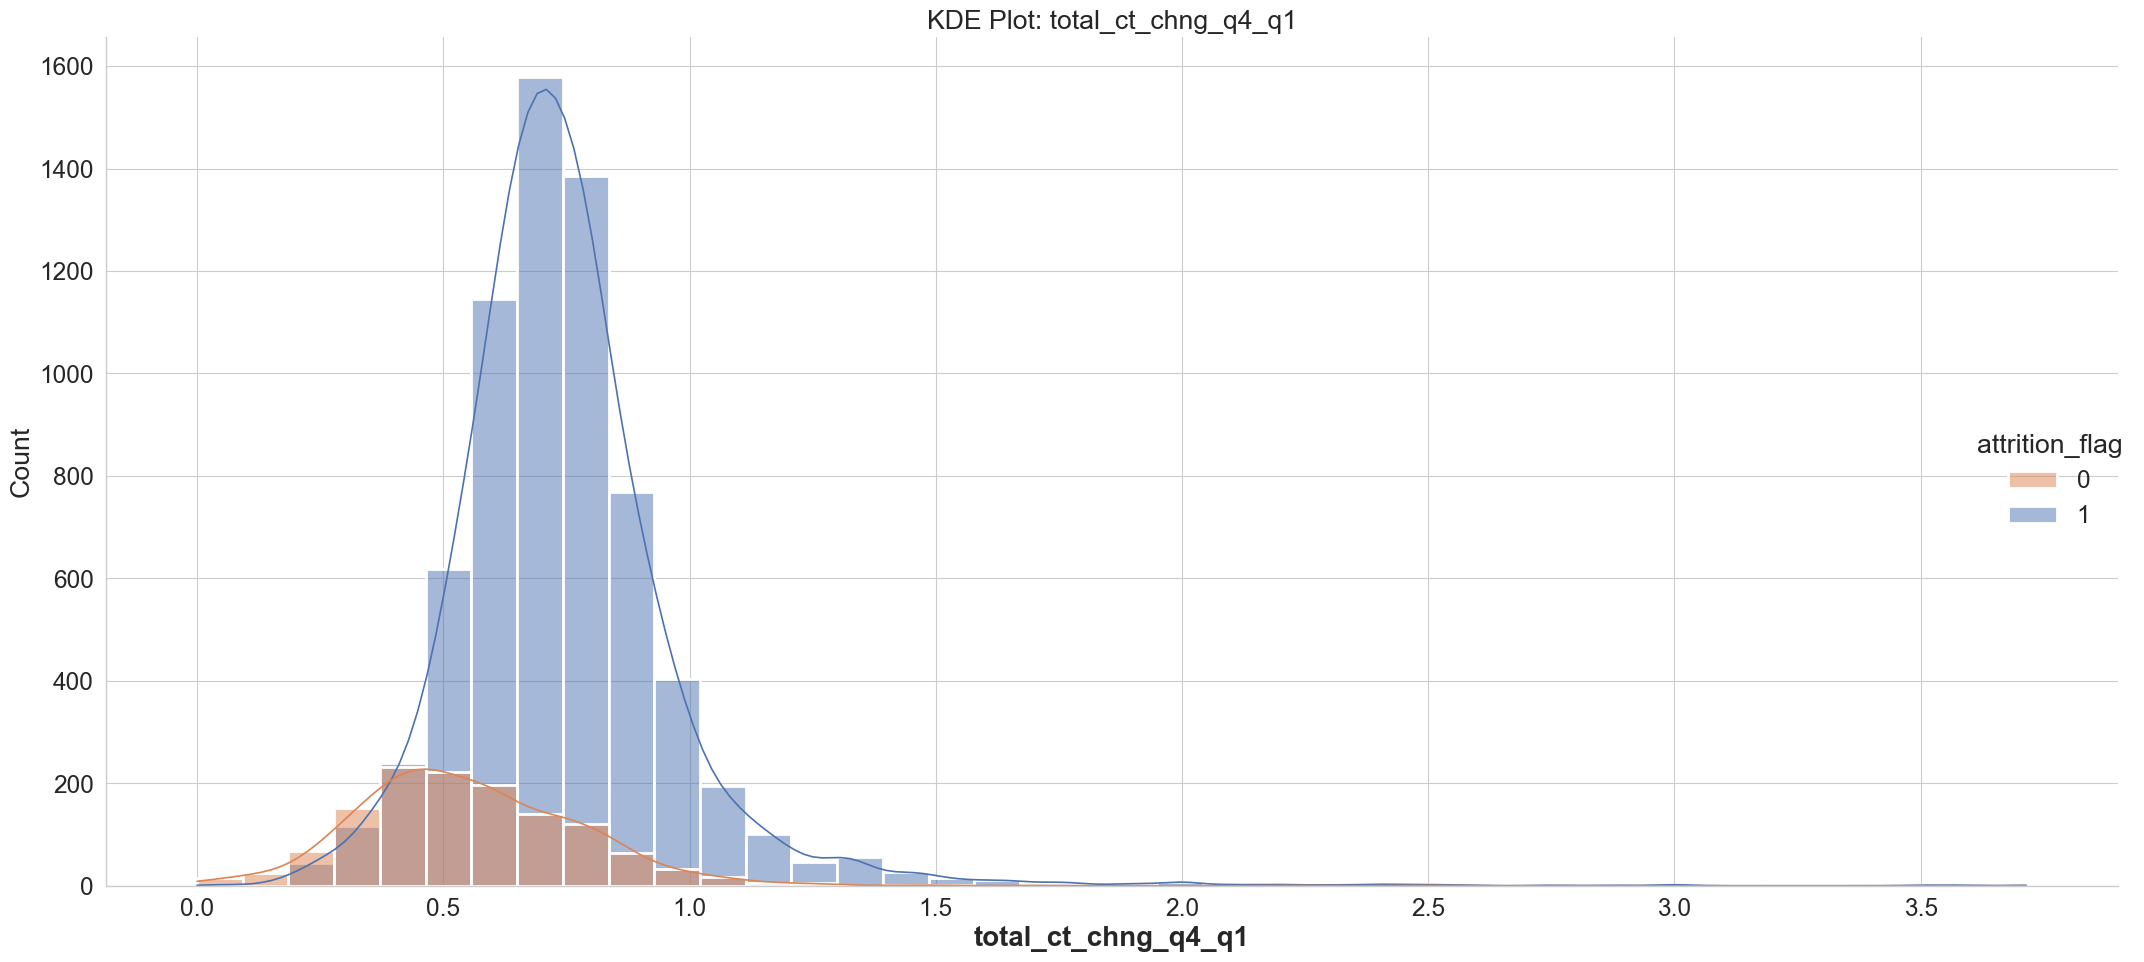

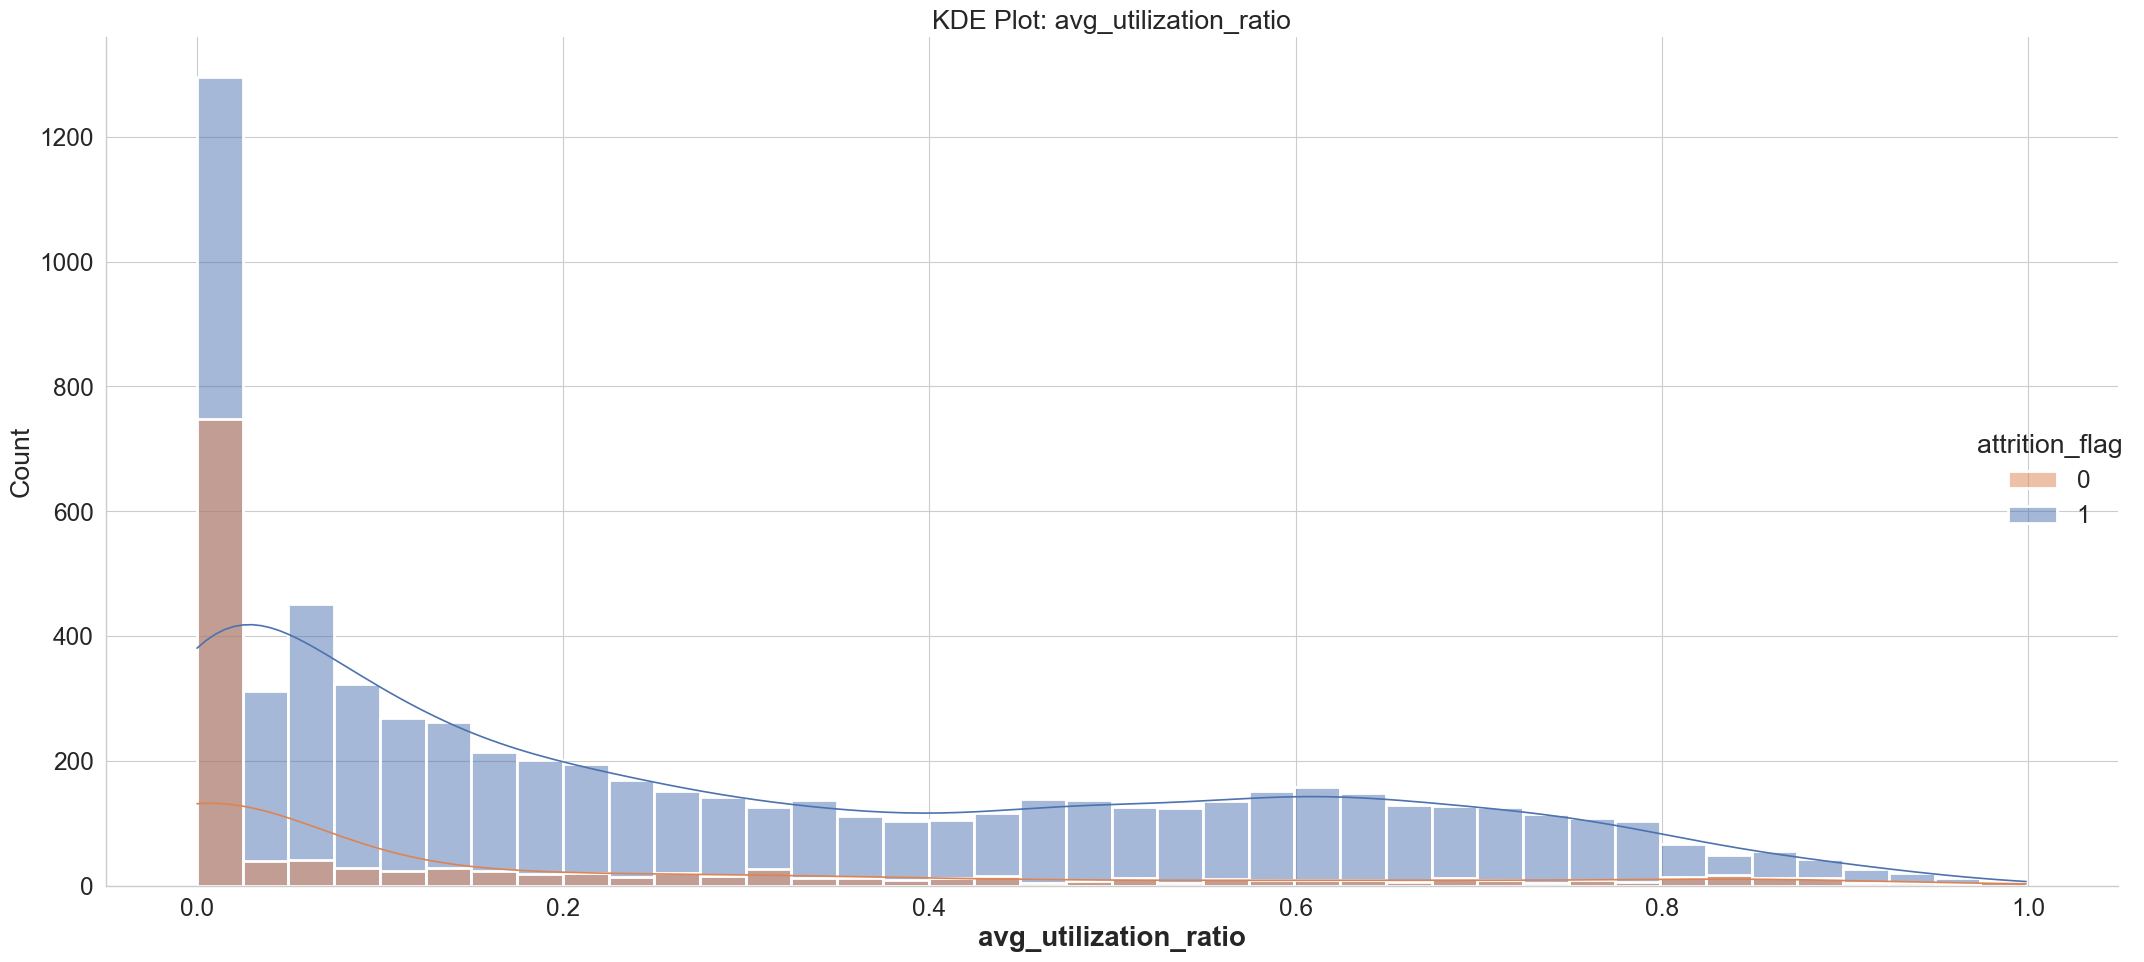

In [19]:
for feature in numerical_features:
    plot_dis(df_train, feature)

#### Numeric Variable Conclusions:

Customers have a higher probability of churning when:
- Months_Inactive_12_mon is less than 3
- Contacts_Count_12_mon is less than 3
- Credit_Limit less than 10000 or over 35000
- Total_Revolving_Bal is less than 50
- Avg_Open_To_Buy less than 10000
- Total_Amt_Chng_Q4_Q1 is 0.75
- Total_Trans_Amt is less than 2500
- Total_Trans_Ct is 40
- Total_Ct_Chng_Q4_Q1 is 0.5
- Avg_Utilization_Ratio is 0.01

## Categorical Features

In [20]:
# Categorical features
categorical_features = df_train.select_dtypes(include='object').columns
categorical_features

Index(['gender', 'education_level', 'marital_status', 'income_category',
       'card_category'],
      dtype='object')

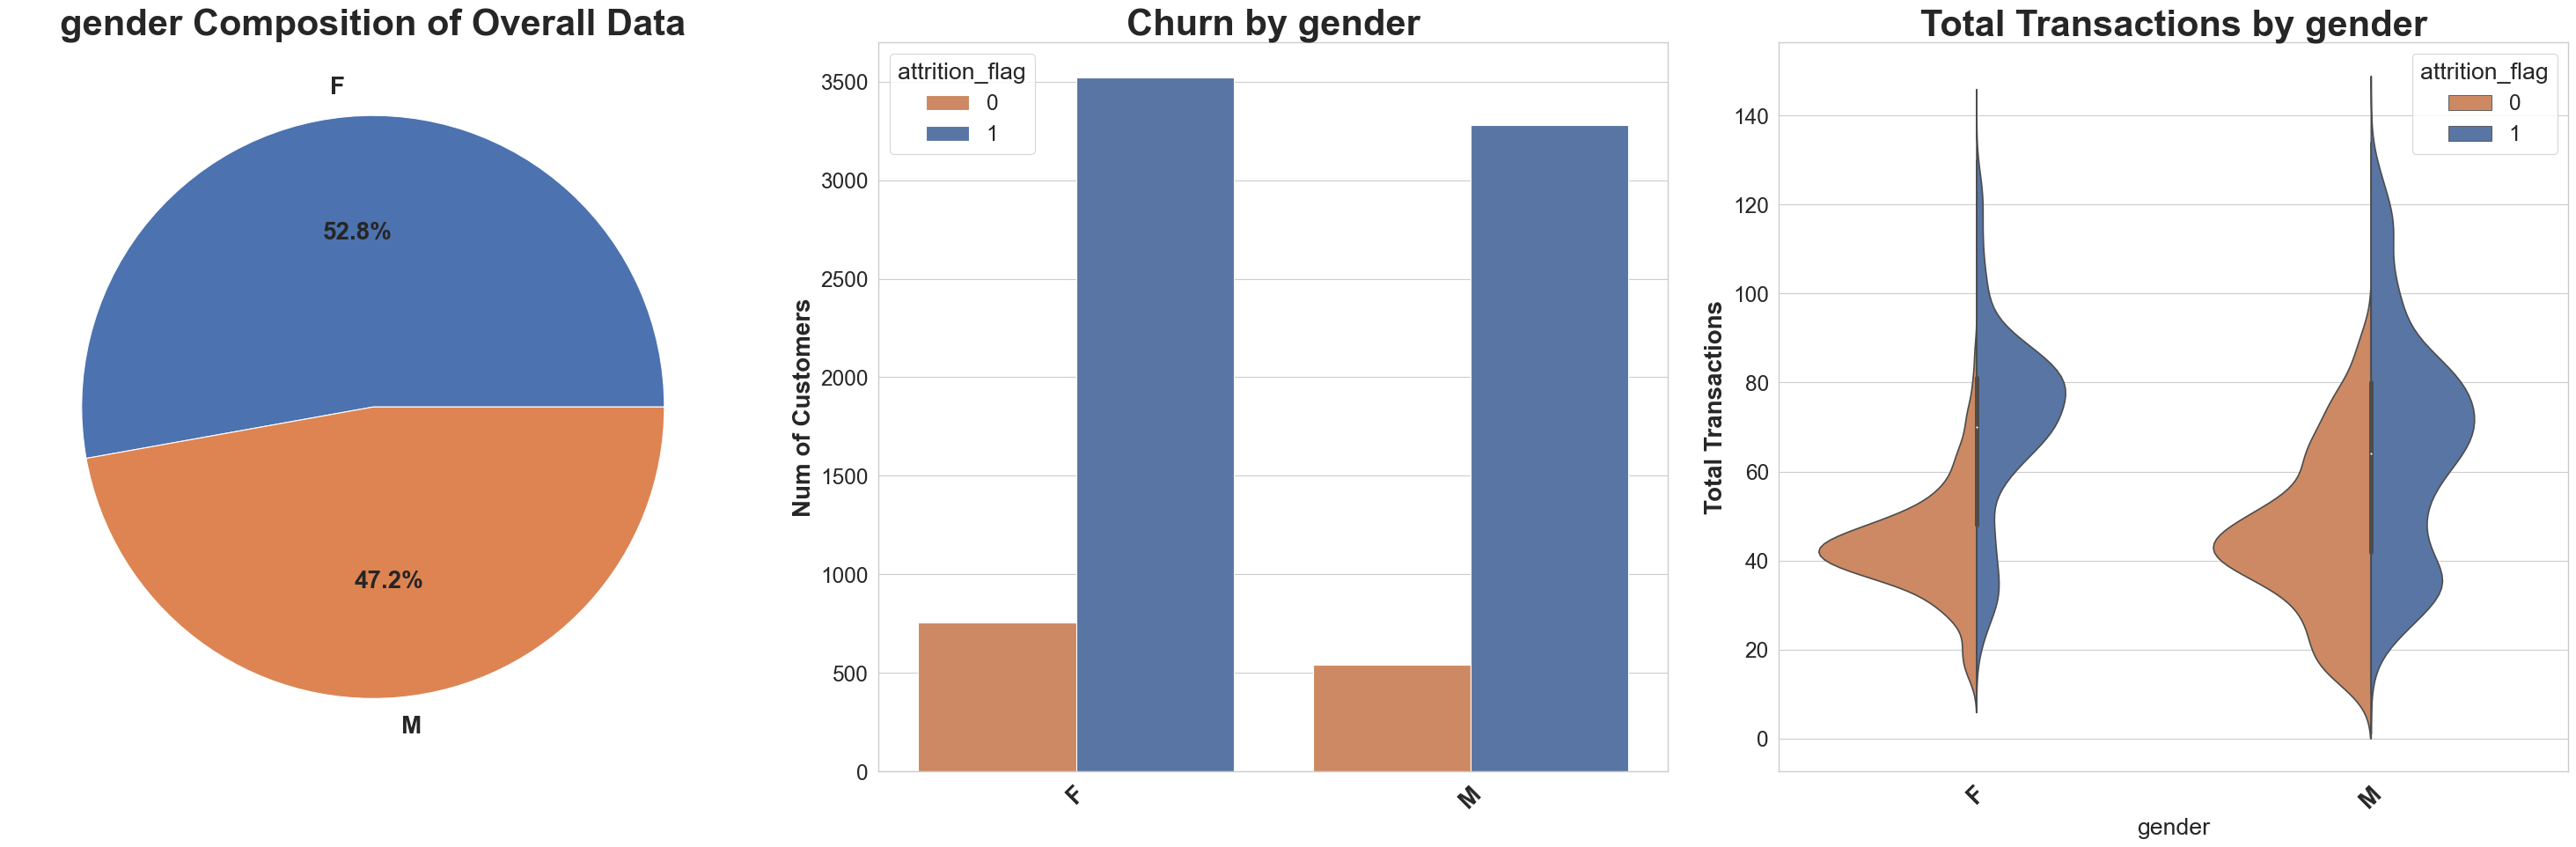

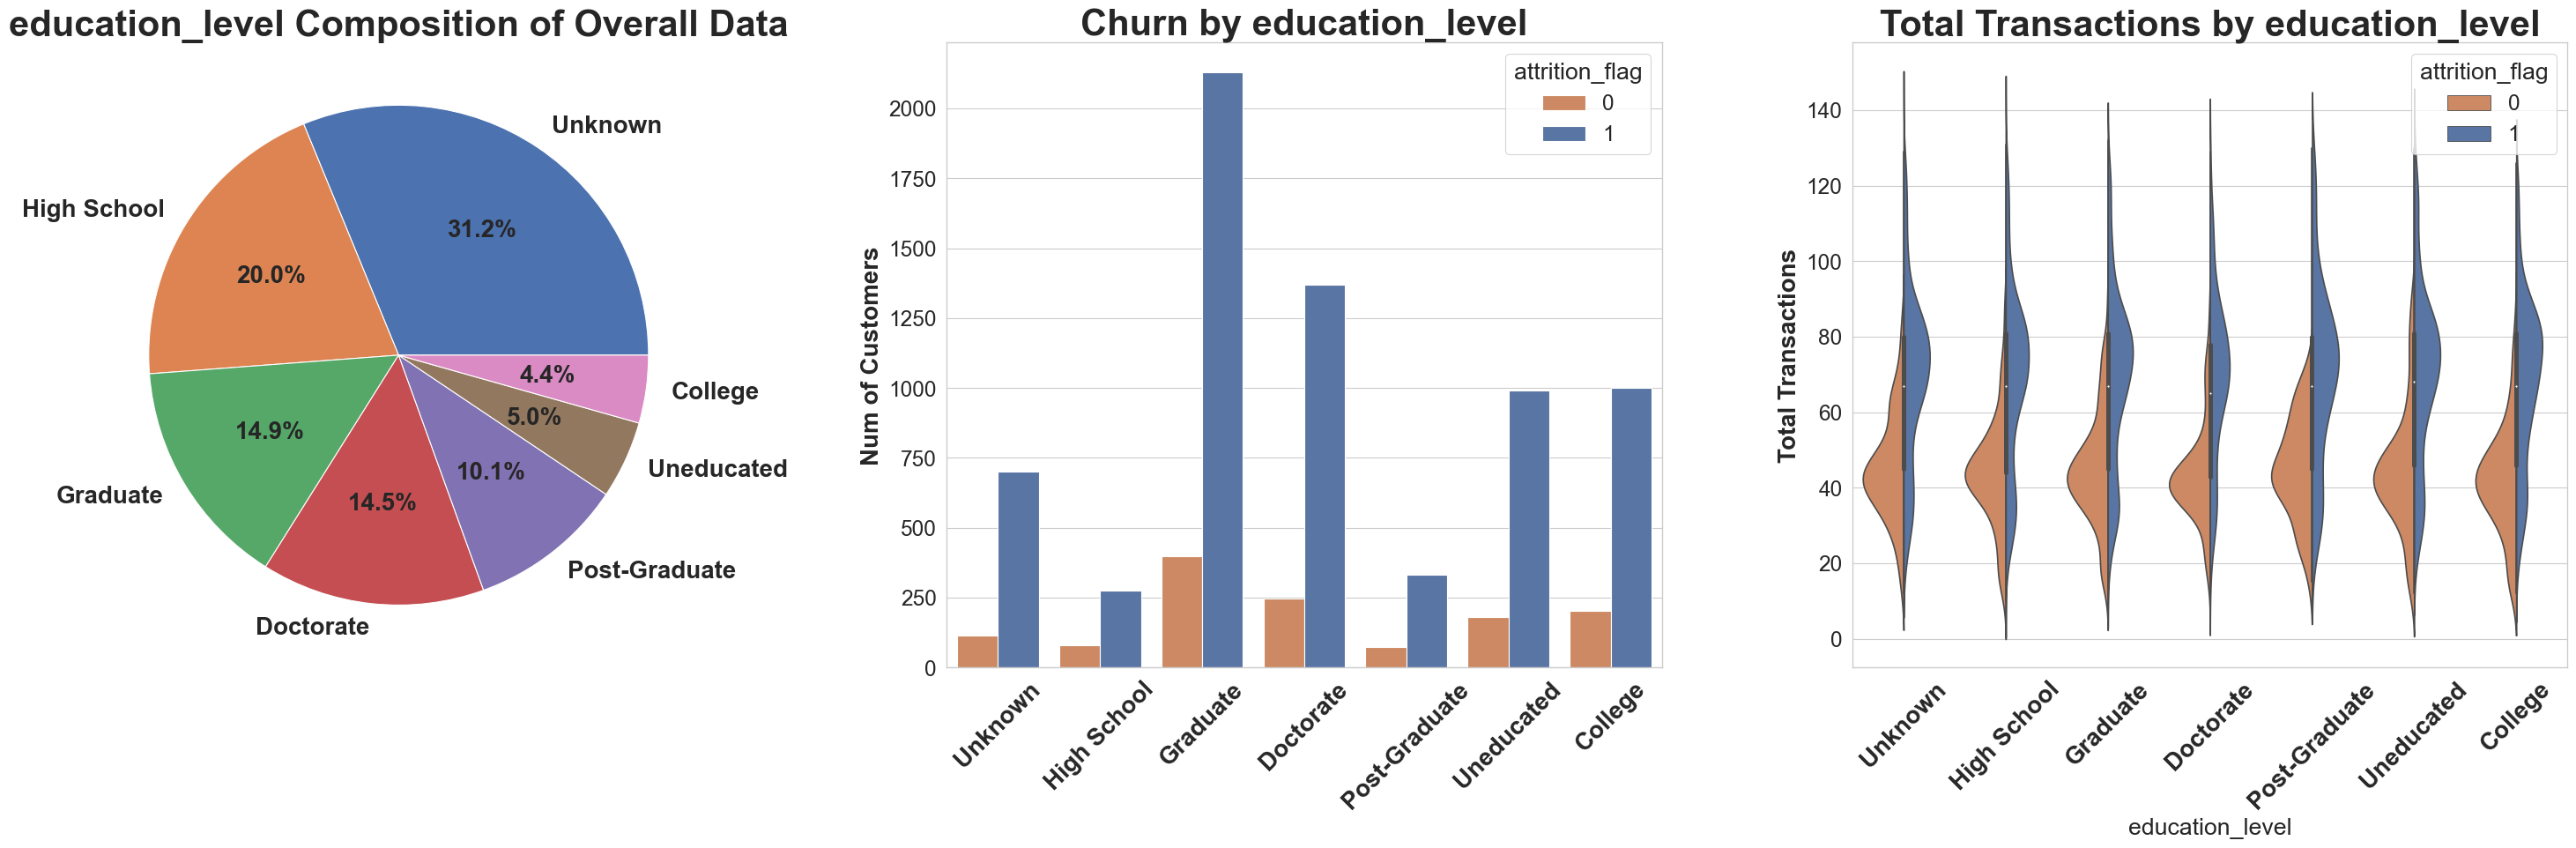

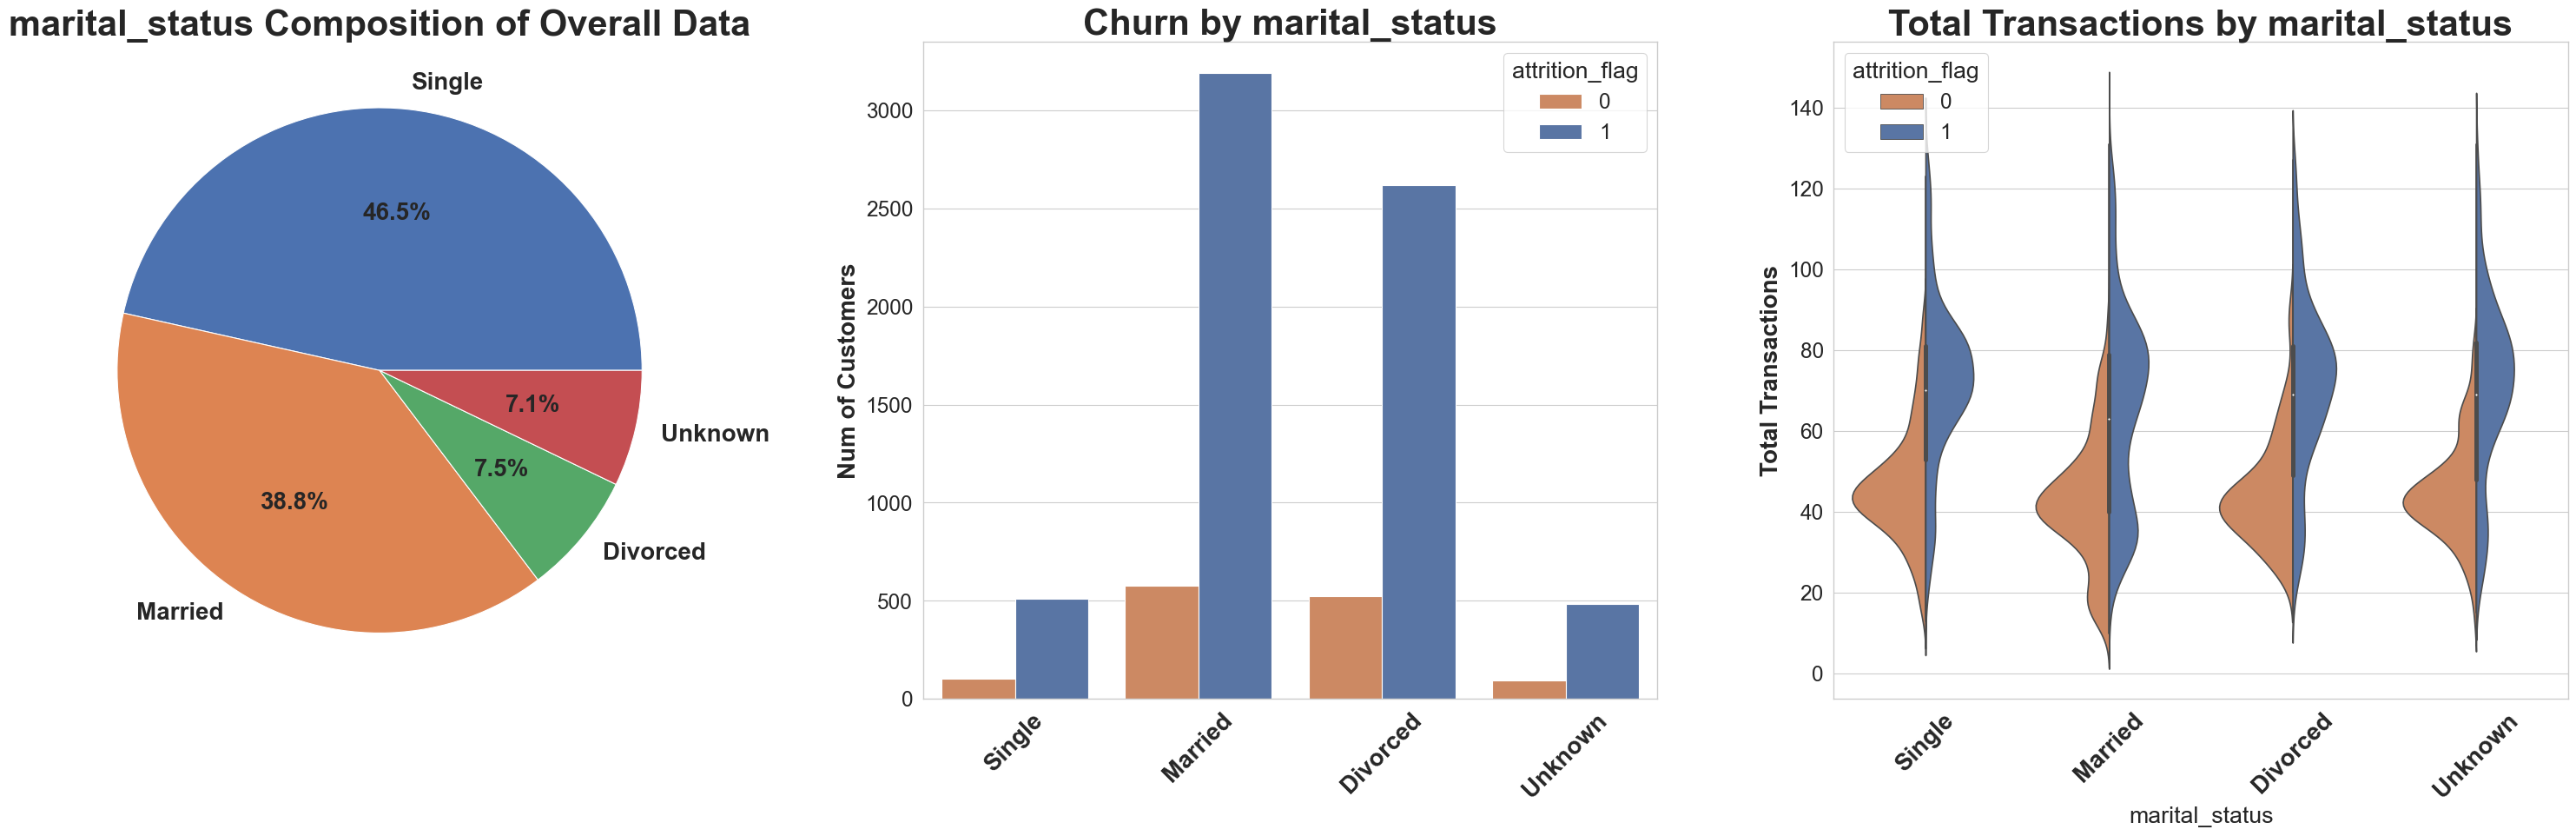

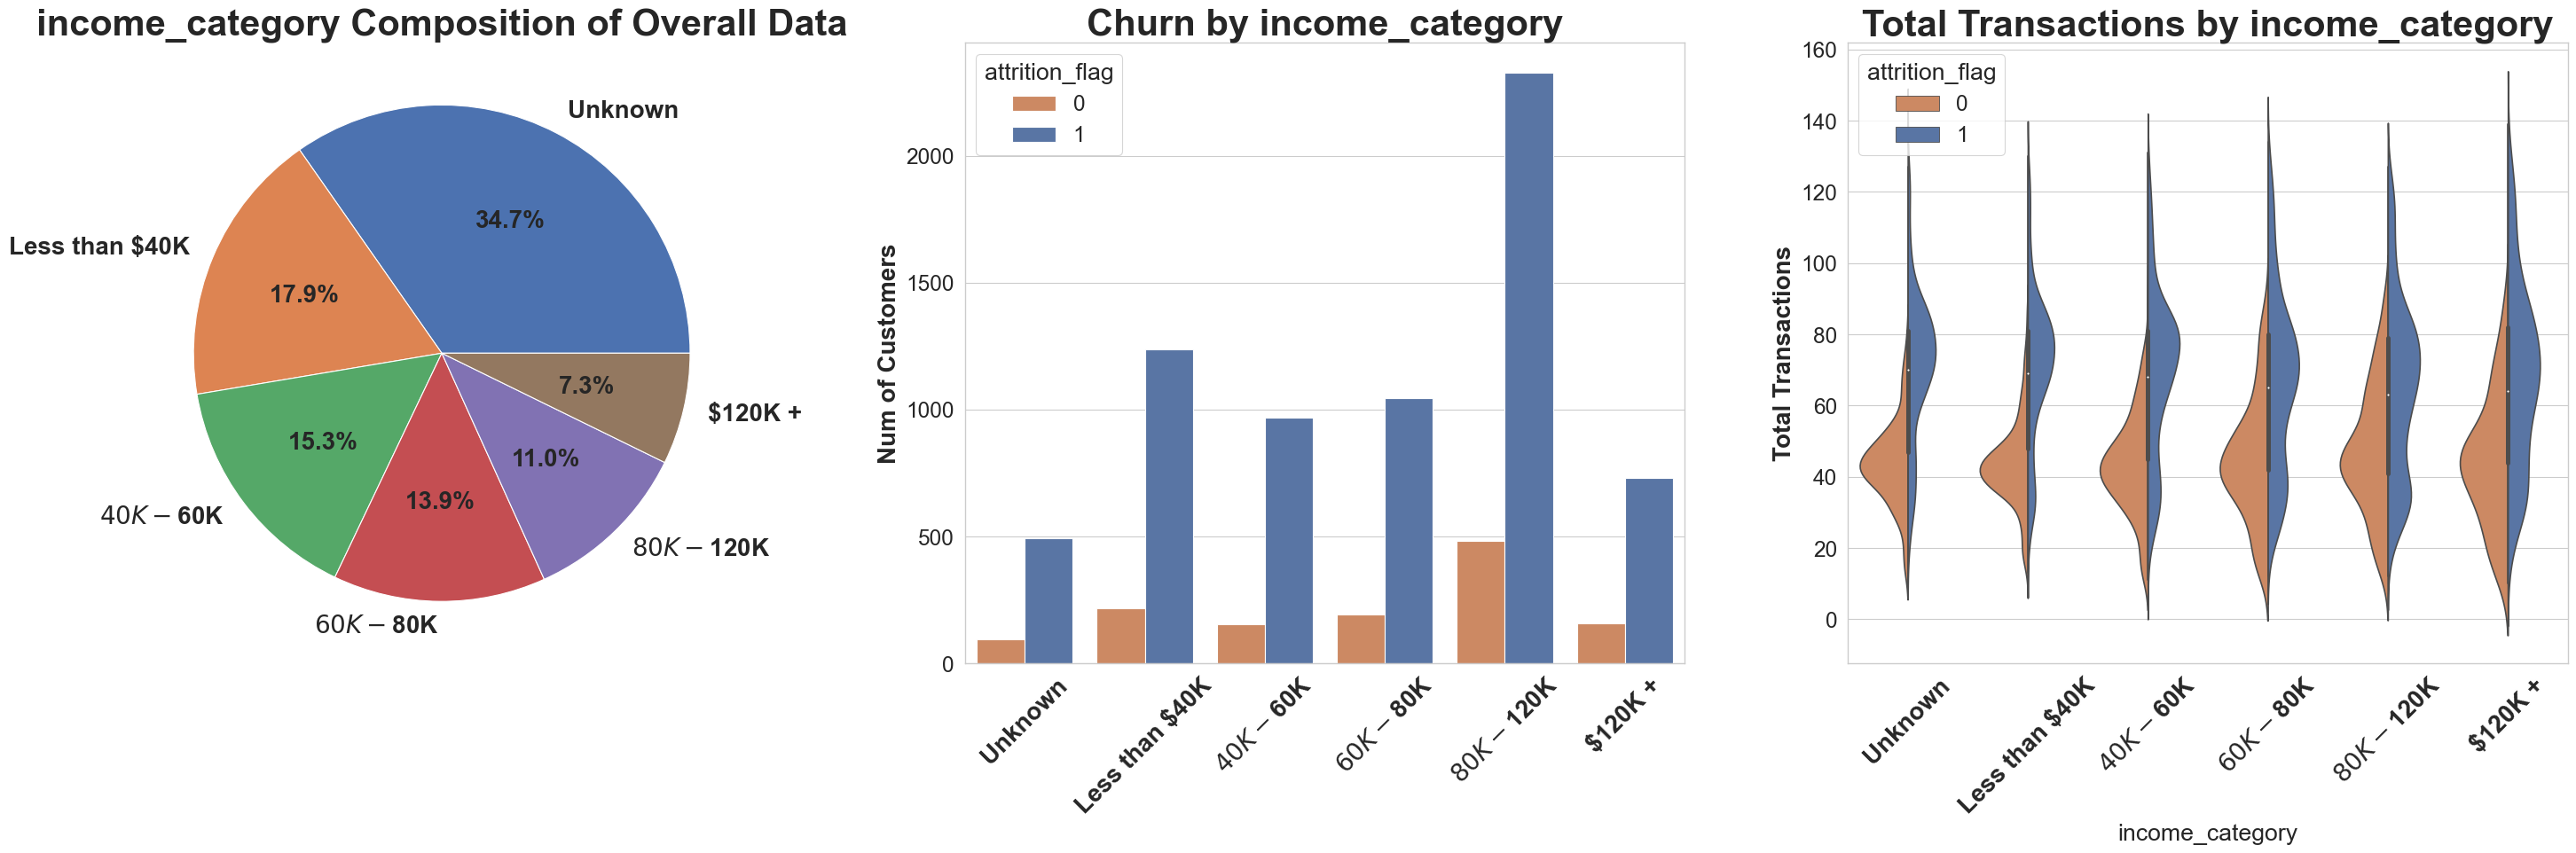

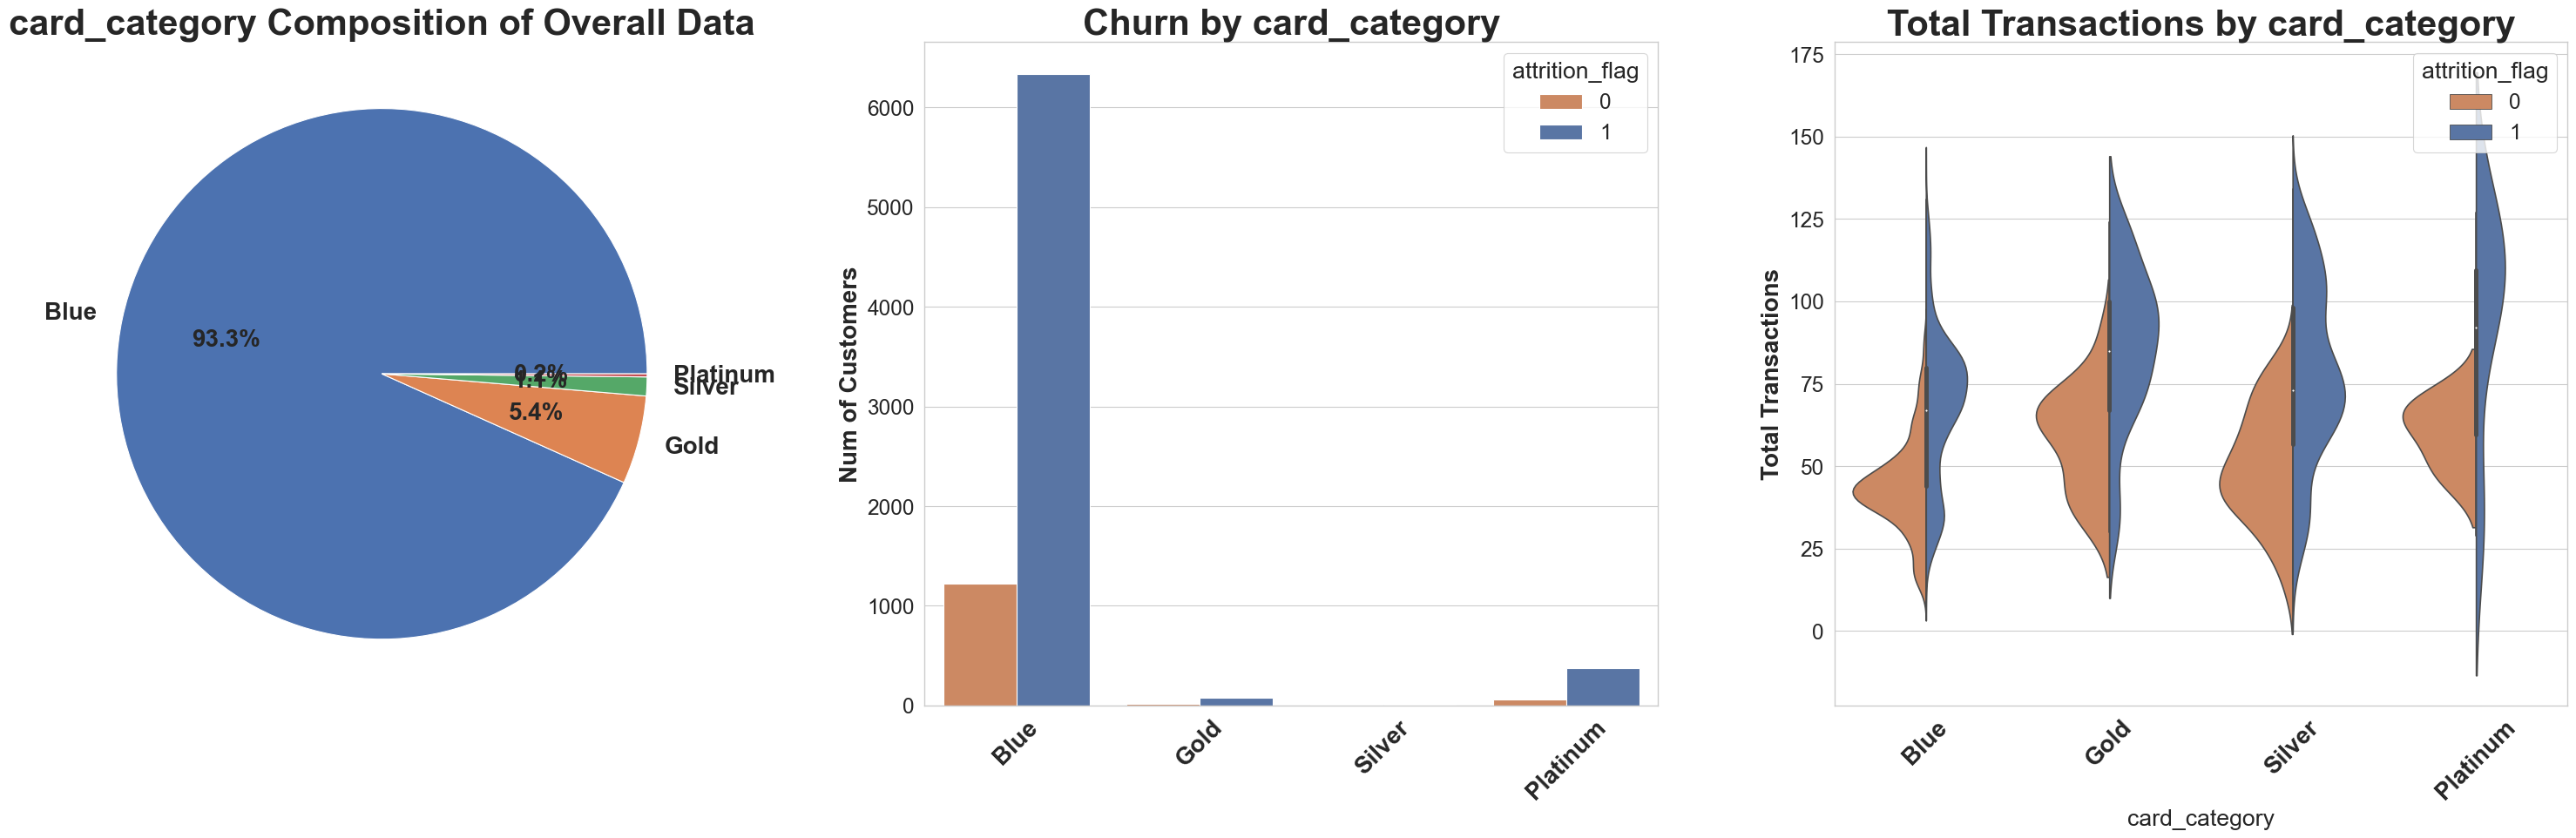

In [21]:
for feature in categorical_features:
    plot_cat_feature(df_train, feature)


#### Numeric Variable Conclusions:
- Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn.
- Our dataset has significantly customer with unknown education. This is a limitation to financial advertising. Education does not appear to be an indicator of Churn.
- Customers with gold and platinum cards tend to churn more.